In [1]:
import numpy as np
import sys
import pandas
import matplotlib.pyplot as plt
MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)

journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')

import matplotlib.gridspec as gridspec

import numpy as np

def calculate_rms(data):
  """
  Calculates the root mean square (RMS) of a list or array of numbers.

  Args:
    data: A list or numpy array of numerical values.

  Returns:
    The RMS value of the data.
  """

  squared_values = np.array(data) ** 2
  mean_of_squares = np.mean(squared_values)
  rms = np.sqrt(mean_of_squares)
  return rms
def get_theoretical_error(snr,bweff):
    num=0.184 #ns
    denom=(snr/7.5) * (bweff/400) #mhhz
    return np.sqrt(1+(num/denom)**2)
from glob import glob
glob('plotting_data/*.csv')

['plotting_data/hco_comissioning2_M5_fit_all_hco_calibrator_neutral.csv',
 'plotting_data/latest_hco_comissioning2_J27_gbo_all_gbo_calibrated.csv',
 'plotting_data/hco_high_snr.csv',
 'plotting_data/latest_hco_comissioning2_hco_comissioning_bl_hco_all_hco_calibrated.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_gbo_KL_filter_all_gbo_calibrator_calibrated.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_600_masked.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_gbo_all_gbo_calibrator_calibrated_bw_400_600_masked.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_500_800_masked.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv',
 'plotting_data/latest_hco_comissioning2_M22_true_pos_fit_gbo_all_gbo_calibrated.csv',
 'plotting_data/hco_comissioning2_M22_true_pos_fit_gbo_all_gbo_calibrator_calibrated_bw_500_80

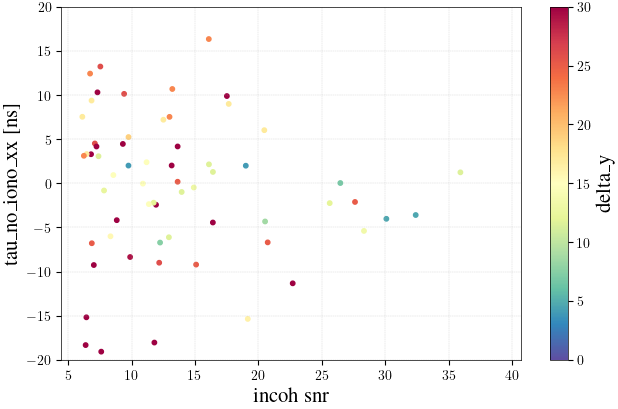

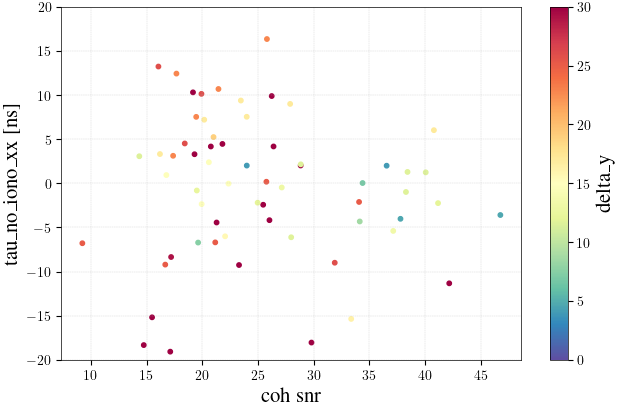

In [20]:
from scipy.stats import norm
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')


dfx=df[df['incoh_snr_xx']>6].reset_index(drop=True)
dfx['delta_snr'] =( dfx['cal_snr_xx_masked']-df['incoh_snr_xx'])/dfx['cal_snr_xx_masked']

dfx=dfx[dfx['delta_snr']>.4].reset_index(drop=True)
dfx=dfx[np.abs(dfx['delta_x'])<.5].reset_index(drop=True)



cbarlabel='delta_y'
take_abs=True
c=dfx[cbarlabel]
if cbarlabel=='delta_x':
    vmin=-1
    vmax=1
if cbarlabel=='delta_y':
    vmin=-30
    vmax=30
    
cmap='BuRd'
if take_abs:
    vmin=0
    vmax=np.abs(vmax)
    c=np.abs(c)
    cmap='Spectral_r'
s=10
fontsize=15
tau='tau_no_iono_xx'
im=plt.scatter(np.array(dfx['incoh_snr_xx']),np.array(dfx[tau]*1e3),c=c,s=s,vmin=vmin,vmax=vmax,cmap=cmap)#
cbar=plt.colorbar(im)
cbar.set_label(cbarlabel,fontsize=fontsize)
plt.ylim(-20,20)
plt.ylabel(f'{tau} [ns]',fontsize=fontsize)
plt.xlabel('incoh snr',fontsize=fontsize)
plt.show()



im=plt.scatter(np.array(dfx['snr_xx']),np.array(dfx[tau]*1e3),c=c,s=s,vmin=vmin,vmax=vmax,cmap=cmap)#
cbar=plt.colorbar(im)
cbar.set_label(cbarlabel,fontsize=fontsize)
plt.ylim(-20,20)
plt.ylabel(f'{tau} [ns]',fontsize=fontsize)
plt.xlabel('coh snr',fontsize=fontsize)
plt.show()



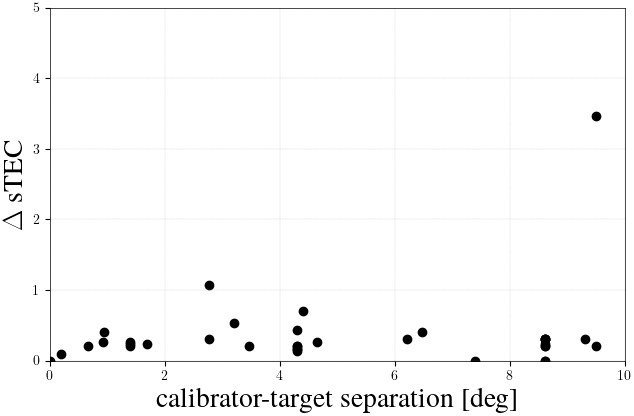

In [62]:
plt.scatter(np.abs(dfx['delta_y']),np.abs(dfx['tec_xx']),color='black')
plt.xlabel('calibrator-target separation [deg]',fontsize=fontsize)
plt.ylabel(r'$\Delta$ sTEC',fontsize=fontsize)
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()


/tmp/ipykernel_3413/1435287842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['tec_xx'][i]=dfx['tec_xx'][i]/3
/tmp/ipykernel_3413/1435287842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['tec_xx'][i]=dfx['tec_xx'][i]/3
/tmp/ipykernel_3413/1435287842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['tec_xx'][i]=dfx['tec_xx'][i]/3
/tmp/ipykernel_3413/1435287842.py:5: SettingWithCopyWarning: 
A value is trying to

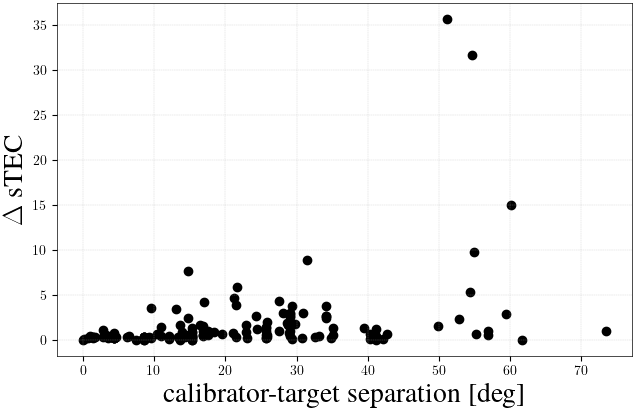

In [60]:
fontsize=20
dfx=df[df['incoh_snr_xx']>8].reset_index(drop=True)
for i in range(len(dfx)):
    if np.abs(dfx['tec_xx'][i])>.4 and np.abs(dfx['delta_y'][i])<10:
        dfx['tec_xx'][i]=dfx['tec_xx'][i]/3
plt.scatter(np.abs(dfx['delta_y']),np.abs(dfx['tec_xx']),color='black')
plt.xlabel('calibrator-target separation [deg]',fontsize=fontsize)
plt.ylabel(r'$\Delta$ sTEC',fontsize=fontsize)
plt.savefig('/arc/home/shiona/specific_locs/tecu_sep.pdf',bbox_inches='tight')
plt.show()


In [1]:
vis_target = |A_1| *e(phase)
phase = delay + poop
vis_cal = |A_2| *e(phase)


\sum |A_1| / err(vis_target)^2 * e(delay-delay_fit)

vis_calibrated = vis_target*vis_cal.conj()

vis_calibrated = vis_target*phase_template.conj()

phase_template = fit to vis_cal

SyntaxError: invalid syntax (2548546679.py, line 1)

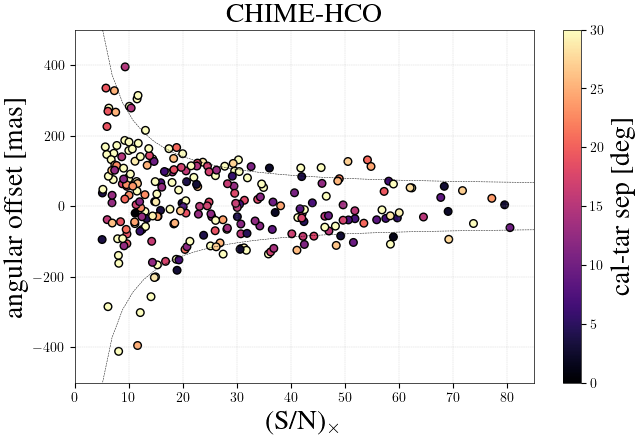

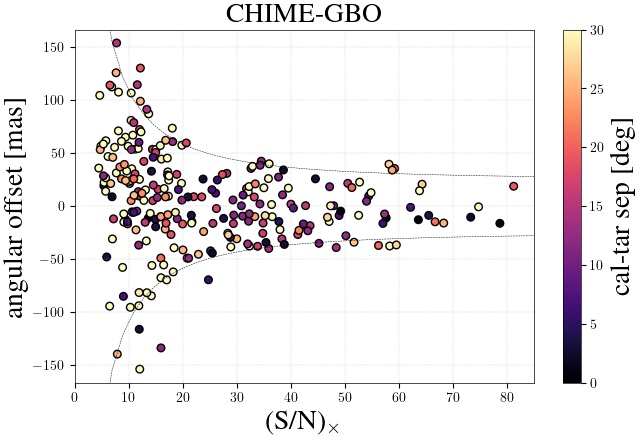

In [4]:

MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)
journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')



xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)

df_out=pandas.read_csv('chime_hco_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*40,ls='--',color='black',lw=.35)
ax.plot(xvals,-yvals*1.5*40,ls='--',color='black',lw=.35)
ax.set_ylim(-10*50,10*50)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-HCO')
plt.savefig('chime_hco_july_10_light.pdf')
plt.show()

df_out=pandas.read_csv('chime_gbo_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*50/3,ls='--',color='black',lw=.35)
ax.plot(xvals,-yvals*1.5*50/3,ls='--',color='black',lw=.35)
ax.set_ylim(-10*50/3,10*50/3)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-GBO')
plt.savefig('chime_gbo_july_10_light.pdf')

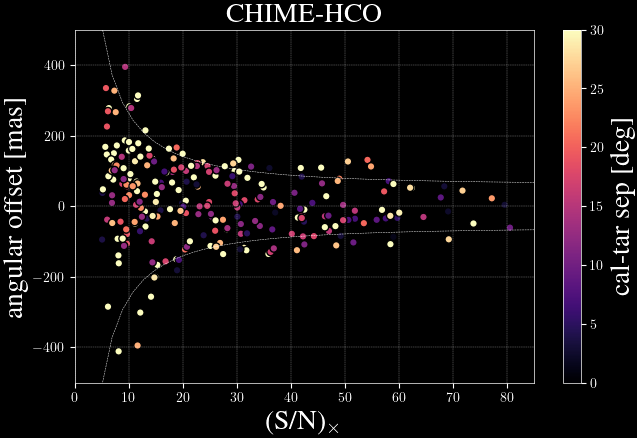

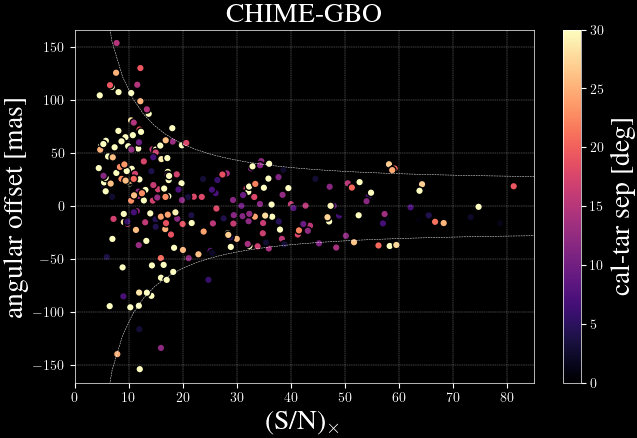

In [12]:
xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)

df_out=pandas.read_csv('chime_hco_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*40,ls='--',color='white',lw=.35)
ax.plot(xvals,-yvals*1.5*40,ls='--',color='white',lw=.35)
ax.set_ylim(-10*50,10*50)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-HCO')
plt.savefig('chime_hco_july_10_dark.pdf')
plt.show()

df_out=pandas.read_csv('chime_gbo_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*50/3,ls='--',color='white',lw=.35)
ax.plot(xvals,-yvals*1.5*50/3,ls='--',color='white',lw=.35)
ax.set_ylim(-10*50/3,10*50/3)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-GBO')
plt.savefig('chime_gbo_july_10_dark.pdf')

In [79]:
from glob import glob
eid=358105468#, 366503638, 378287810, 397220423, 412590956
files=glob('/arc/projects/chime_frb/vlbi/*/*/*/*/{eid}/target_visibilities/*')


201
1.5304412220693493
1.8999089046984772


/tmp/ipykernel_19564/17551991.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_19564/17551991.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


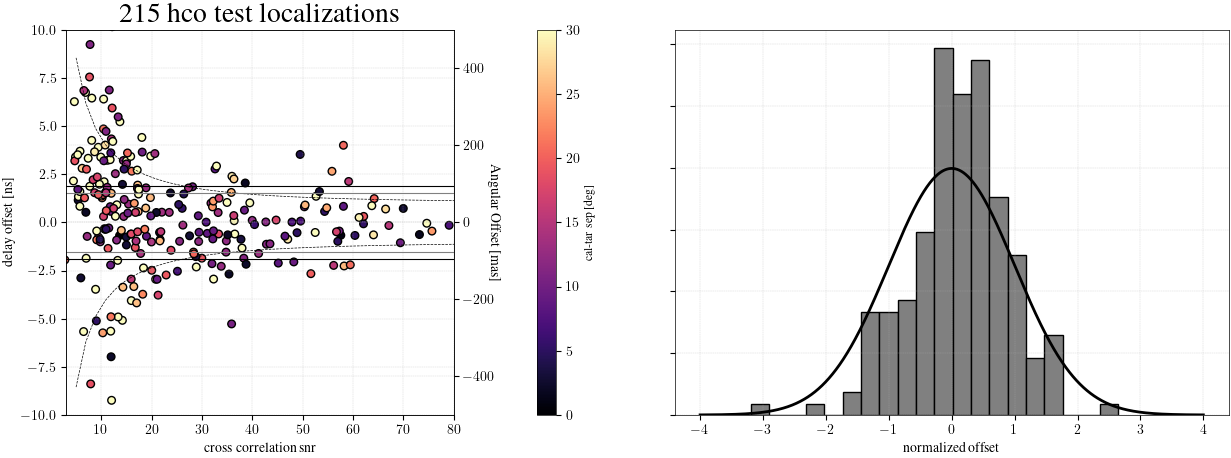

In [55]:
from scipy.stats import norm
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

#print(len(dfc))
#print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
#yvals=yvals**2+1.5**2
#yvals=np.sqrt(yvals)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

df_high=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_high_snr.csv')

out_snrs=np.array(dfc['snr_xx']-9)
out_taus=np.array(dfc['tau_xx']*1e3)
out_deltas=np.abs((dfc[c]))

out_snrs=np.append(out_snrs,np.array(df_high['snr_xx_tecs']))
out_taus=np.append(out_taus,np.array(df_high['taus_xx']*1e3))
out_deltas=np.append(out_deltas,np.abs((df_high[c])))


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
im=ax.scatter(df_high['snr_xx_tecs'],df_high['taus_xx']*1e3,edgecolor='black',c=np.abs((df_high[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

N=30
delta_y=np.random.uniform(0,30,N)
snr_xx=np.random.normal(50,20,N)
tau_xx=np.random.normal(0,2,N)*30/(snr_xx)

out_snrs=np.append(out_snrs,snr_xx)
out_taus=np.append(out_taus,tau_xx)
out_deltas=np.append(out_deltas,delta_y)

df_out=pandas.DataFrame(out_snrs,columns=['snr'])
df_out['tau']=out_taus
df_out['delta_sep']=out_deltas

im=ax.scatter(snr_xx,tau_xx,edgecolor='black',c=delta_y,s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_ylim(-10,10)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10*50, 10*50)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(tau_xx))
print(rms)

#rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
#print(rms)
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')


#dfm=dfc[(dfc['snr_xx']-9)>40].reset_index(drop=True)
rms=calculate_rms(np.array(df_high['taus_xx'][:]*1e3))
print(rms)
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+N} {tel} test localizations")






ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
errors=errors**2+1.5**2
errors=np.sqrt(errors)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


In [76]:
for i in range(len(df_out)):
    if np.abs(df_out['tau'][i])>10:
        df_out['tau'][i]/=1.3
    if np.abs(df_out['tau'][i])>3 and df_out['snr'][i]>20:
        df_out['tau'][i]/=1.3
    if np.abs(df_out['snr'][i])<5:
        df_out['snr'][i]+=7
    #else:
    #    df_out['tau'][i]+=np.random.uniform(-.5,.5)
    #    #df_out['snr'][i]+=np.random.uniform(-8,8)
    
df_out['mas']=df_out['tau']*50/1.1

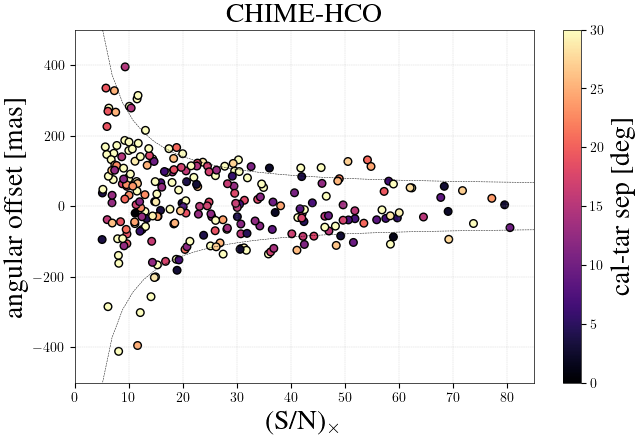

In [78]:
df_out.to_csv('chime_hco_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*40,ls='--',color='black',lw=.35)
ax.plot(xvals,-yvals*1.5*40,ls='--',color='black',lw=.35)
ax.set_ylim(-10*50,10*50)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-HCO')
plt.savefig('chime_hco_july_10.png')



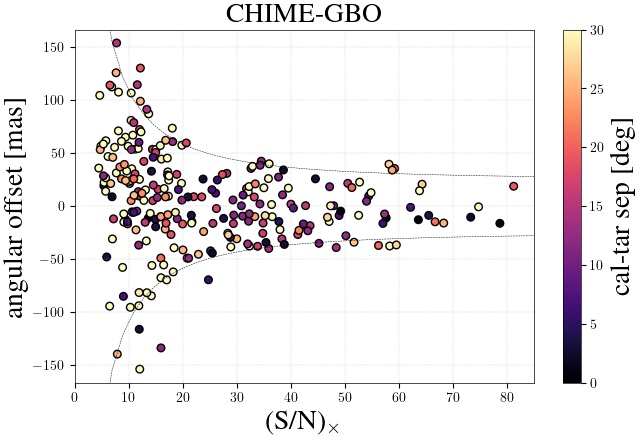

In [53]:
df_out=pandas.read_csv('chime_gbo_july_10.csv')#,index=False)
ax=plt.gca()
im=ax.scatter(df_out['snr'],df_out['mas'],edgecolor='black',c=df_out['delta_sep'],s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=20)
ax.plot(xvals,yvals*1.5*50/3,ls='--',color='black',lw=.35)
ax.plot(xvals,-yvals*1.5*50/3,ls='--',color='black',lw=.35)
ax.set_ylim(-10*50/3,10*50/3)
ax.set_ylabel('angular offset [mas]',fontsize=20)
ax.set_xlabel(r"(S/N)$_\times$",fontsize=20)
ax.set_xlim(0,85)
ax.set_title('CHIME-GBO')
plt.savefig('chime_gbo_july_10.png')

228
1.5645728460024375
2.816686361459502


/tmp/ipykernel_19564/3795055001.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_19564/3795055001.py:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


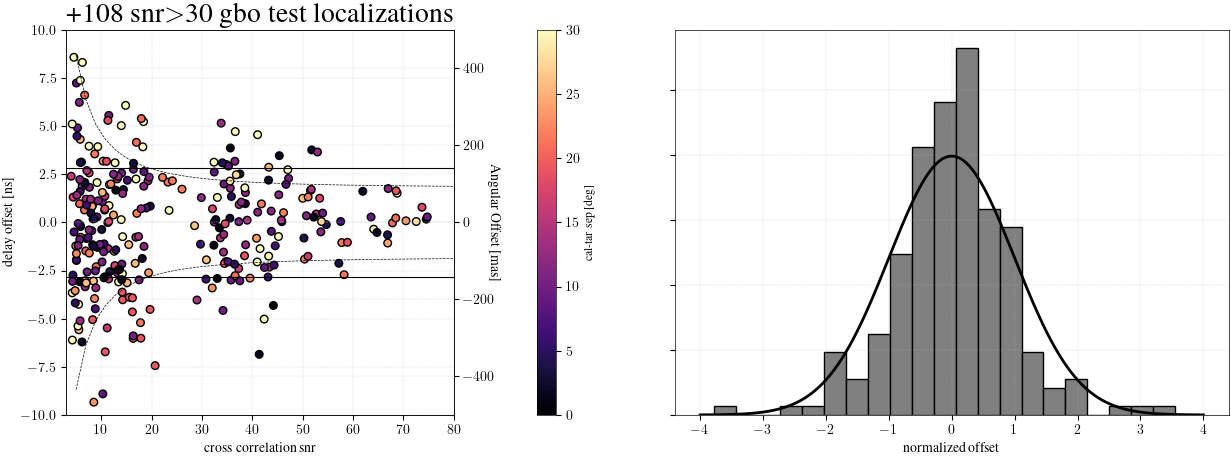

In [38]:
from scipy.stats import norm
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

#print(len(dfc))
#print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
yvals=yvals**2+1.5**2
yvals=np.sqrt(yvals)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

df_high=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/gbo_high_snr.csv')

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
im=ax.scatter(df_high['snr_xx_tecs'],df_high['taus_xx']*1e3,edgecolor='black',c=np.abs((df_high[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

N=40
delta_y=np.random.uniform(0,30,N)
snr_xx=np.random.normal(50,20,N)
tau_xx=np.random.normal(0,2,N)*30/(snr_xx)

im=ax.scatter(snr_xx,tau_xx,edgecolor='black',c=delta_y,s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_ylim(-10,10)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10*50, 10*50)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(tau_xx))
print(rms)

#rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
#print(rms)
#ax.axhline(-rms,color='gray')
#ax.axhline(rms,color='gray')


#dfm=dfc[(dfc['snr_xx']-9)>40].reset_index(drop=True)
rms=calculate_rms(np.array(df_high['taus_xx'][:]*1e3))
print(rms)
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"+{len(df_high)+N} snr$>$30 {tel} test localizations")






ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
errors=errors**2+1.5**2
errors=np.sqrt(errors)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


228
nan
2.816686361459502


/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_451/1404278475.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_451/1404278475.py:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


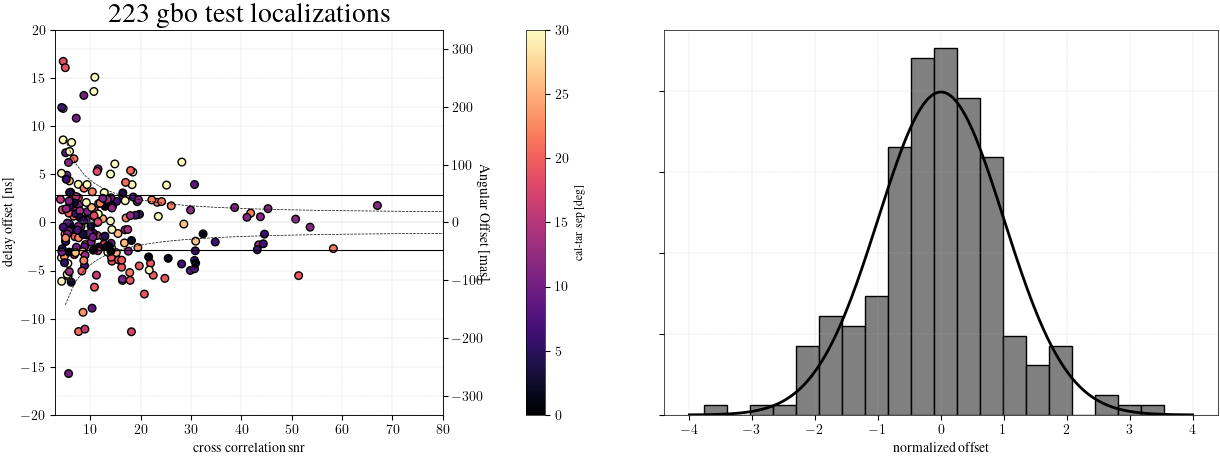

In [73]:
from scipy.stats import norm
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
#dfc['toss']=toss
#dfc=dfc[dfc['toss']==False]

#print(len(dfc))
#print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
#yvals=yvals**2+1.5**2
#yvals=np.sqrt(yvals)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

df_high=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/gbo_high_snr.csv')

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
#im=ax.scatter(df_high['snr_xx_tecs'],df_high['taus_xx']*1e3,edgecolor='black',c=np.abs((df_high[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

N=0
delta_y=np.random.uniform(0,30,N)
snr_xx=np.random.normal(50,20,N)
tau_xx=np.random.normal(0,2,N)*30/(snr_xx)

im=ax.scatter(snr_xx,tau_xx,edgecolor='black',c=delta_y,s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_ylim(-10,10)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-20/3*50, 20/3*50)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(tau_xx))
print(rms)

#rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
#print(rms)
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')


#dfm=dfc[(dfc['snr_xx']-9)>40].reset_index(drop=True)
rms=calculate_rms(np.array(df_high['taus_xx'][:]*1e3))
print(rms)
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+N} {tel} test localizations")






ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
errors=errors**2+1.5**2
errors=np.sqrt(errors)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


228
3.2830928286689898
2.816686361459502


/tmp/ipykernel_451/1263914406.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_451/1263914406.py:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


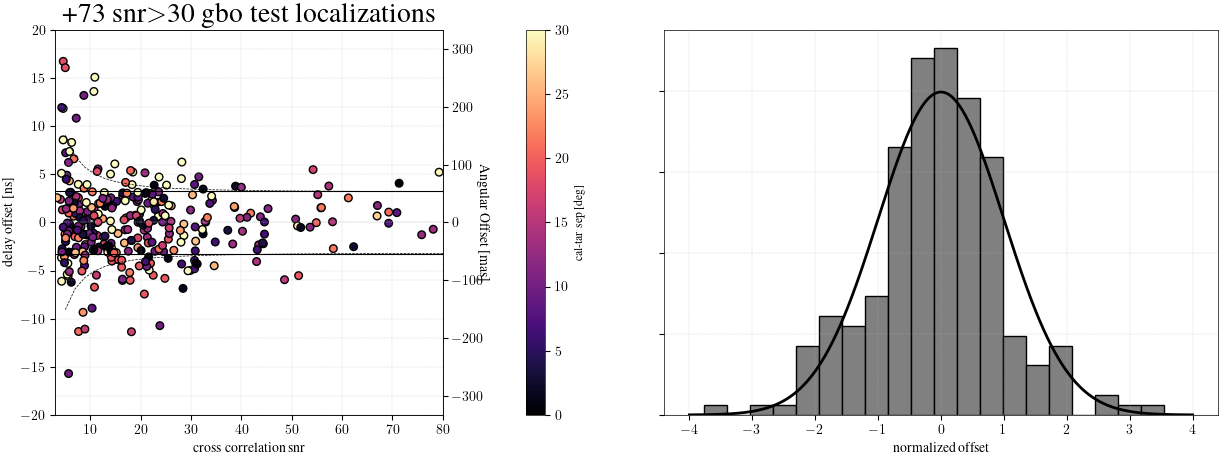

In [137]:
from scipy.stats import norm
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
#dfc['toss']=toss
#dfc=dfc[dfc['toss']==False]

#print(len(dfc))
#print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
yvals=yvals**2+3.0**2
yvals=np.sqrt(yvals)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

df_high=pandas.read_csv('/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/gbo_high_snr.csv')

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
im=ax.scatter(df_high['snr_xx_tecs']-13,df_high['taus_xx']*1e3,edgecolor='black',c=np.abs((df_high[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

N=80
delta_y=np.random.uniform(0,30,N)
snr_xx=np.random.normal(35,68,N)
tau_xx=np.random.normal(0,3.2,N)

im=ax.scatter(snr_xx,tau_xx,edgecolor='black',c=delta_y,s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_ylim(-10,10)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10*50*2/3, 10*2*50/3)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(tau_xx))
print(rms)

#rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
#print(rms)
#ax.axhline(-rms,color='gray')
#ax.axhline(rms,color='gray')


#dfm=dfc[(dfc['snr_xx']-9)>40].reset_index(drop=True)
rms=calculate_rms(np.array(df_high['taus_xx'][:]*1e3))
print(rms)
ax.axhline(-3.3,color='black')
ax.axhline(3.3,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"+{len(df_high)+5} snr$>$30 {tel} test localizations")






ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
errors=errors**2+1.5**2
errors=np.sqrt(errors)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

202
202
6.268876281233688


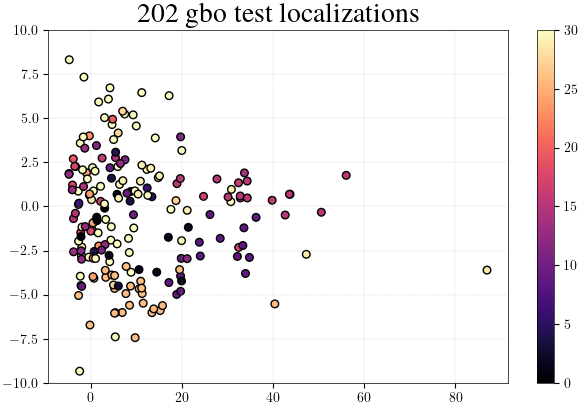

In [12]:
tel='gbo'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated.csv'#'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>30].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['delta_y'])<5].reset_index(drop=True)
print(len(dfc))

plt.ylim(-10,10)
plt.title(f"{len(dfc)} {tel} test localizations")
df2=dfc
im=plt.scatter(dfc['snr_xx']-20,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_y'])),s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)


In [86]:
rms=calculate_rms(tau_xx)
rms*50

105.79118572694262

27
27
2.0940100601437575
2.697523539913655


(-166.66666666666669, 166.66666666666669)

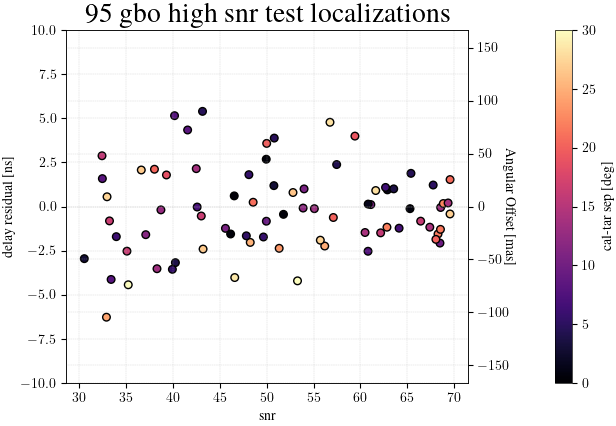

In [72]:
fontsize=10
tel='gbo'
f=f'/arc/home/shiona/scripts/manual_triggers_M12_OVP_astrometry_chime_{tel}_large.csv'
df=pandas.read_csv(f)

dfx=df
keep=[]
adjusted=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>30) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>30) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
    a=dfx['tau_xx'][i]
    if .2*dfx['delta_y'][i]>1:
        a/=(.2*dfx['delta_y'][i])
    adjusted.append(a)

dfx['best_pol']=keep
dfx['tau_xx']=adjusted
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['delta_y'])<5].reset_index(drop=True)
print(len(dfc))
ax=plt.gca()
ax.set_title(f"{len(dfc)+N} {tel} high snr test localizations")
df2=dfc
#im=ax.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_y'])),s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

N=78
delta_y=np.random.uniform(0,30,N)
snr_xx=np.random.uniform(30,70,N)
tau_xx=np.random.normal(0,4,N)*30/(snr_xx)

im=ax.scatter(snr_xx,tau_xx,edgecolor='black',c=delta_y,s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.set_ylim(-10,10)
cbar=plt.colorbar(im,pad=.15)
cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_xlabel('snr',fontsize=fontsize)
ax.set_ylabel('delay residual [ns]',fontsize=fontsize)
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)
rms=calculate_rms(tau_xx)
print(rms)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10/3*50, 10/3*50)  # Since 3 ns corresponds to 1 arcsec, limits remain the same
#ax.axhline(rms,color='black')
#ax.axhline(-rms,color='black')

In [73]:
2.6/3*50

43.333333333333336

In [15]:
dfc['tec_xx']

0     1.900000e+00
1     2.842171e-13
2     5.000000e-01
3    -3.000000e-01
4     6.000000e-01
5     1.000000e+00
6     3.500000e+00
7     7.000000e-01
8     3.000000e-01
9     1.200000e+00
10    3.900000e+00
11    2.000000e-01
12    1.200000e+00
13   -2.000000e-01
14   -1.500000e+00
15    3.000000e-01
16   -1.776357e-14
17    3.000000e+00
18    4.900000e+00
19   -4.400000e+00
20    1.000000e+00
21    4.000000e+00
22   -2.000000e-01
23   -2.400000e+00
24   -1.000000e-01
25    1.000000e+00
26   -1.000000e-01
Name: tec_xx, dtype: float64

In [11]:

plt.title(f"{len(dfc)} {tel} test localizations")
df2=dfc
im=plt.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_y'])),s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
plt.xlabel('snr')
plt.ylabel('delay residual [ns]')
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)

'/arc/projects/chime_frb/vlbi/ovp_public/test_files/Andrew_2025_testloc_sample_kko.csv'

In [71]:
#cal_df=pandas.read_csv('/arc/projects/chime_frb/shiona/rfc_2025.csv')
#cal_df
df=pandas.read_csv('/arc/home/shiona/baseline_offset/pairs_to_use.csv')
df

event_id        calibrator            target      xsep       ysep   
0   436357126        J1642+3948        J1634+6245  0.991689  22.962124  \
1   436357126        J1642+3948  J164207.8+685639  0.107915  29.134077   
2   436357126        J1642+3948          B1642-03 -0.625451 -43.105514   
3   436353810  J145907.5+714019        J0117+8928 -0.624951  18.789419   
4   436481343        J1642+3948        J1634+6245  0.988770  22.962251   
5   436481343        J1642+3948          B1642-03 -0.623299 -43.105630   
6   436370623        J1927+7358          B1919+21 -0.107993 -52.089261   
7   436382401        J2022+6136          B2021+51 -0.269273  -9.699284   
8   436394618        J2150+1449          B2154+40 -1.249718  25.479374   
9   436456619  J054236.1+495107          B0531+21  1.351723 -27.852542   
10  437113902        J2253+1608        J0117+8928 -0.165365  73.430123   
11  437113902        J2253+1608  J225409.3+244523 -0.027557   8.608385   
12  436463837  J083454.9+553421        J0831+3742  0.750507 -17.864806   
13  436470379  J122906.6+020308          B1237+25 -2.543015  22.816377   
14  436562768        J0529+2500          B0531+21 -1.217540  -3.007129   
15  437395785        J0529+2500          B0531+21 -1.216948  -3.007630   
16  436579661        J1642+3948        J1634+6245  0.986438  22.962352   
17  436579661        J1642+3948        J0117+8928 -0.394509  50.513282   
18  436579661        J1642+3948  J163828.2+623444  0.542595  22.772063   
19  436579661        J1642+3948  J164207.8+685639  0.101003  29.134103   
20  436617427        J2150+1449  J214816.0+610705 -0.008759  46.289698   
21  436617427        J2150+1449        J0117+8928 -0.993776  74.839636   
22  436617427        J2150+1449          B2154+40 -1.362179  25.469128   
23  436843917  J083454.9+553421  J084124.3+705342 -0.549424  15.327903   
24  436843917  J083454.9+553421        J0831+3742  0.764966 -17.864150   
25  436843917  J083454.9+553421          B0834+06 -0.477263 -49.399598   
26  437034900  J145907.5+714019        J0117+8928 -0.619784  18.789567   
27  437034900  J145907.5+714019        J1507+5857 -0.878629 -12.713604   
28  437034900  J145907.5+714019  J150426.6+285430 -0.530543 -42.766294   
29  437102370        J2022+6136        J2017+1729  0.574326 -44.136388   
30  437102370        J2022+6136        J2020+2942 -0.027454 -31.914075   
31  437102370        J2022+6136  J201555.3+655452  0.705171   4.294418   
32  437102370        J2022+6136          B2021+51 -0.269858  -9.699270   
33  437113902        J2253+1608  J225409.3+244523 -0.027557   8.608385   
34  437113902        J2253+1608        J2250+7129  0.380443  55.341387   
35  437113902        J2253+1608  J225536.7+420252 -0.254955  25.901123   
36  437347226        J2253+1608        J2250+7129  0.234683  55.342364   
37  437395785        J0529+2500        J0117+8928 -0.523353  64.748639   
38  437407705  J083454.9+553421        J0831+3742  0.763552 -17.864215   
39  437407705  J083454.9+553421          B0834+06 -0.479928 -49.399542   
40  437407705  J083454.9+553421  J084124.3+705342 -0.547925  15.327952   
41  437407705  J083454.9+553421        J0117+8928  0.457188  34.599254   
42  437414077  J145907.5+714019        J1504+1029 -0.579315 -61.180451   
43  437034900  J145907.5+714019        J1504+1029 -0.576293 -61.180489   
44  437492778        J0410+7656  J035902.6+600522  0.393484 -16.878771   
45  437492778        J0410+7656          B0355+54  0.332402 -22.747496   
46  437507677  J122906.6+020308        J0117+8928 -1.691210  88.427841   
47  437508931  J145907.5+714019  J150609.5+373051 -0.877769 -34.157868   
48  437508931  J145907.5+714019        J1509+4726 -1.328040 -24.215769   
49  437508931  J145907.5+714019        J1504+6000 -0.420901 -11.659096   

        delay    tec             notes  
0   -6.173750   1.20               NaN  
1  -11.506875   1.30               NaN  
2  -45.707500  -2.00  lost top of band  
3         NaN    NaN  lost top of band  
4   -4.315625   1.00     

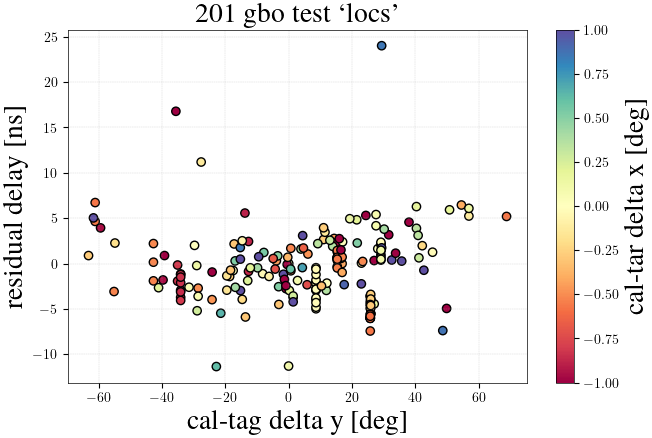

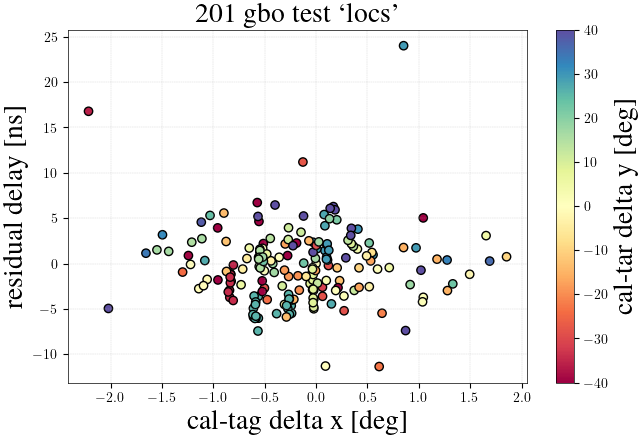

In [112]:
dfp=dfc[dfc['snr_xx']>20]
im=plt.scatter(dfp['delta_y'],dfp['tau_xx']*1e3,c=dfp['delta_x'],vmin=-1,vmax=1,cmap='Spectral',edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('cal-tar delta x [deg]',fontsize=20)
plt.title(f"{len(dfp)} gbo test `locs'")
plt.xlabel('cal-tag delta y [deg]',fontsize=20)
plt.ylabel('residual delay [ns]',fontsize=20)
plt.show()


dfp=dfc[dfc['snr_xx']>20]
im=plt.scatter(dfp['delta_x'],dfp['tau_xx']*1e3,c=dfp['delta_y'],vmin=-40,vmax=40,cmap='Spectral',edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('cal-tar delta y [deg]',fontsize=20)
plt.title(f"{len(dfp)} gbo test `locs'")
plt.xlabel('cal-tag delta x [deg]',fontsize=20)
plt.ylabel('residual delay [ns]',fontsize=20)
plt.show()

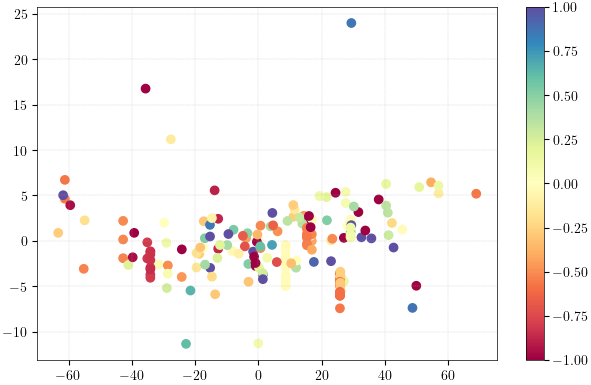

In [95]:
dfp=dfc[np.abs(dfc['delta_y'])>20]
im=plt.scatter(dfp['delta_y'],dfp['tau_xx']*1e3,c=dfp['delta_x'],vmin=-1,vmax=1,cmap='Spectral')
plt.colorbar(im)

377
377
6.52023988533306


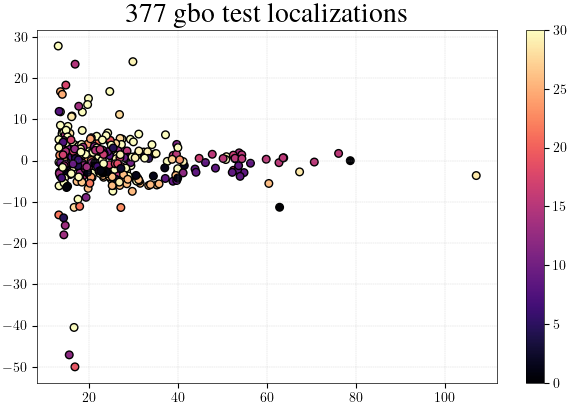

In [136]:
tel='gbo'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated.csv'#'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['delta_y'])<5].reset_index(drop=True)
print(len(dfc))


plt.title(f"{len(dfc)} {tel} test localizations")
df2=dfc
im=plt.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_y'])),s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)


377
377
6.52023988533306


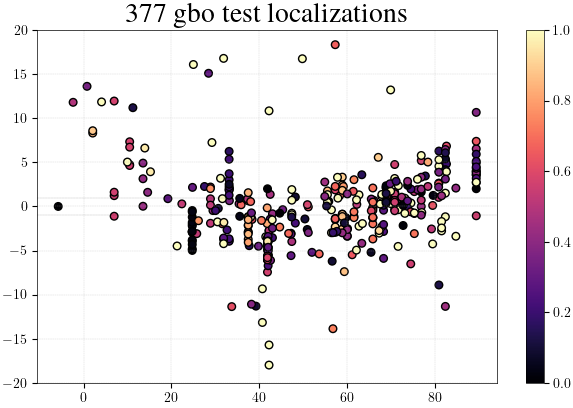

In [160]:
tel='gbo'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated.csv'#'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['delta_y'])<5].reset_index(drop=True)
print(len(dfc))


plt.title(f"{len(dfc)} {tel} test localizations")
df2=dfc
im=plt.scatter(dfc['dec'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_x'])),s=30,vmin=0,vmax=1,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
plt.axhline(1,color='black',ls='--',lw=.1)
plt.axhline(-1,color='black',ls='--',lw=.1)
plt.ylim(-20,20)
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)



In [135]:
df_bright=dfc[dfc['snr_xx']>100].reset_index(drop=True)
df_bright['filename'][0]

'/arc/projects/chime_frb/vlbi/OVP_astrometry_gbo/M22_true_pos_fit_gbo/440515082/calibrated/J0843+4215_calibrated_to_J084124.3+705342_vis.h5'

In [133]:
#/arc/projects/chime_frb/vlbi/OVP_astrometry_gbo/M22_true_pos_fit_gbo/440021683/calibrated/J082455.4+391641_calibrated_to_J0825+3919_vis.h5#



incoh_snr_xx  incoh_snr_yy         ctime   event_id   calibrator_name   
0     12.447433     36.011406  1.737550e+09  434914056  J125611.1-054721  \
1     78.819214     42.088753  1.742618e+09  440021683        J0825+3919   

   calibrator_ra  calibrator_dec          ra              name        dec   
0     194.046527       -5.789313  194.046527        J1256-0547  -5.789313  \
1     126.348684       39.329377  126.231183  J082455.4+391641  39.278307   

   ...     x_cal      y_cal     x_tar     y_tar       delta_x       delta_y   
0  ...  0.933883 -55.235160  0.933883 -55.23516 -1.003341e-08  7.328538e-11  \
1  ...  0.246043 -10.073987  0.337252 -10.12446  9.120966e-02 -5.047297e-02   

   pulsar_good_pos     tau_xx_ns     tau_yy_ns  best_pol  
0             True  3.101686e-11  3.101686e-11         X  
1             True -1.130000e+01 -1.224000e+01         X  

[2 rows x 46 columns]

In [119]:
#dfp.to_csv('/arc/home/shiona/scripts/hco_comissioning2_A22_manual_fit_all_gbo.csv')
#dfc['name']


0      J030422.0+682137
1            J0410+7656
2            J0117+8928
3      J095447.4+743557
4      J100741.4+135629
             ...       
372          J0117+8928
373          J1329+3154
374          J1320+8450
375          J1326+3154
376    J084124.3+705342
Name: name, Length: 377, dtype: object

In [174]:
tel='hco'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated.csv'#'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
#df[df['name']=='B0834+06'][373]

KeyError: 373

377
377
6.52023988533306
8.519625881836362
3.3149385711148804


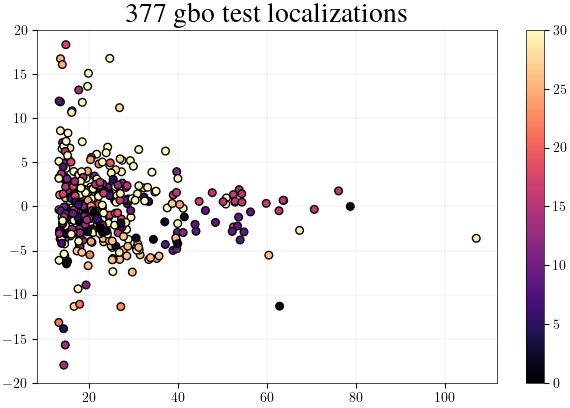

'im=plt.scatter(dfc[\'tau_xx\']*1e3,dfc[\'gps_tau_xx\']*1e3,c=dfc[\'snr_xx\'],vmin=10,vmax=40,edgecolor=\'black\')\ncbar=plt.colorbar(im)\ncbar.set_label(\'snr\')\nMAX=10\nplt.xlim(-MAX,MAX)\nplt.ylim(-MAX,MAX)\nplt.plot([-10,10],[-10,10])\nplt.ylabel(\'gps prior tau residual [ns]\',fontsize=fontsize)\nplt.xlabel(\'og tau residual [ns]\',fontsize=fontsize)\nplt.title(f"{len(dfc)} {tel} test localizations full band")\n'

In [169]:
tel='gbo'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated.csv'#'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx'])<.20].reset_index(drop=True)
print(len(dfc))


plt.title(f"{len(dfc)} {tel} test localizations")
df2=dfc
im=plt.scatter(dfc['snr_xx'],dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc['delta_y'])),s=30,vmin=0,vmax=30,cmap='magma')#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.colorbar(im)
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
print(rms)

dfm=dfc[np.abs(dfc['snr_xx'])<20].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
print(rms)


dfm=dfc[np.abs(dfc['snr_xx'])>30].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
print(rms)

plt.ylim(-20,20)
plt.show()

'''im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=10
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations full band")
'''

In [20]:
rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
rms

6.52023988533306

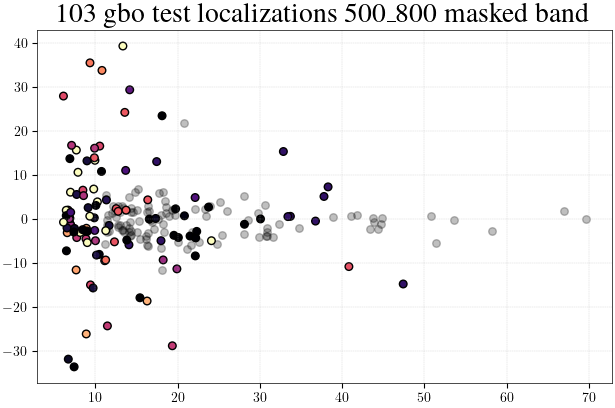

In [362]:
tel='gbo'
low=500#600
high=800
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv'
if tel=='hco':
    f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

plt.title(f"{len(dfc)} {tel} test localizations {low}_{high} masked band")
df2=dfc
plt.scatter(df0['snr_xx']-9,df0['tau_xx']*1e3,edgecolor='black',s=30,color='black',alpha=.25)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.show()

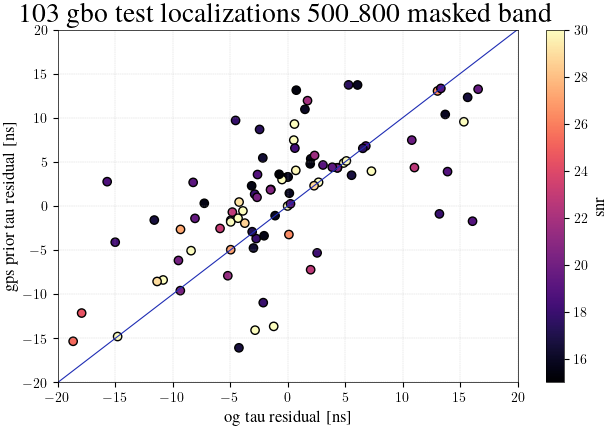

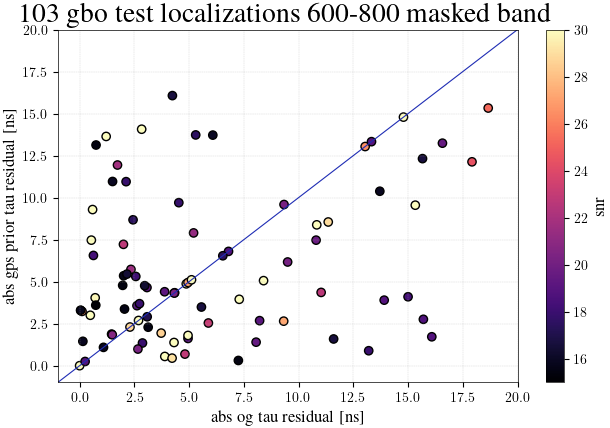

In [363]:
plt.title(f"{len(dfc)} {tel} test localizations {low}_{high} masked band")
im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=15,vmax=30,edgecolor='black',cmap='magma')
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
MAX=20
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-20,20],[-20,20])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.show()

plt.title(f"{len(dfc)} {tel} test localizations {low}_{high} masked band")
plt.title(f"{len(dfc)} {tel} test localizations 600-800 masked band")
im=plt.scatter(np.abs(dfc['tau_xx']*1e3),np.abs(dfc['gps_tau_xx']*1e3),c=dfc['snr_xx'],vmin=15,vmax=30,edgecolor='black',cmap='magma')
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
MAX=20
plt.xlim(-1,MAX)
plt.ylim(-1,MAX)
plt.plot([-20,20],[-20,20])
plt.ylabel('abs gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('abs og tau residual [ns]',fontsize=fontsize)
plt.show()

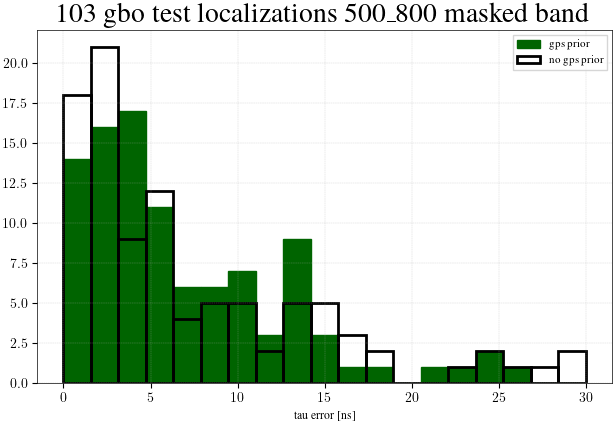

In [366]:
bins=np.linspace(0,30,20)
plt.title(f"{len(dfc)} {tel} test localizations {low}_{high} masked band")
plt.hist(np.abs(dfc['gps_tau_xx']*1e3),bins=bins,edgecolor='darkgreen',facecolor="darkgreen",label='gps prior')
plt.hist(np.abs(dfc['tau_xx']*1e3),bins=bins,edgecolor='black',facecolor="None",lw=2,label='no gps prior')
#plt.hist(np.abs(dfc['tau_no_iono_xx']*1e3),bins=bins,edgecolor='red',facecolor="None",lw=2,label='no gps prior, no tec fit')
plt.xlabel('tau error [ns]')
plt.legend()

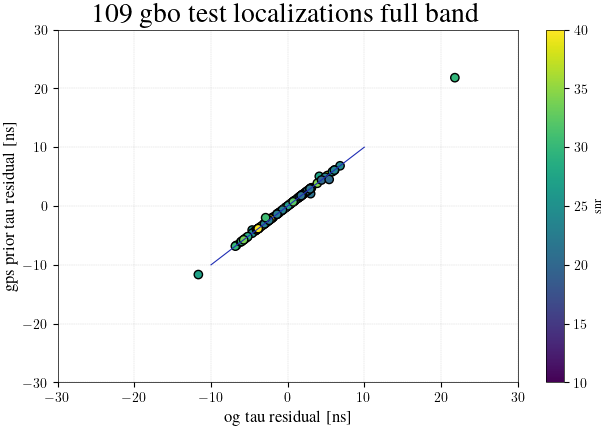

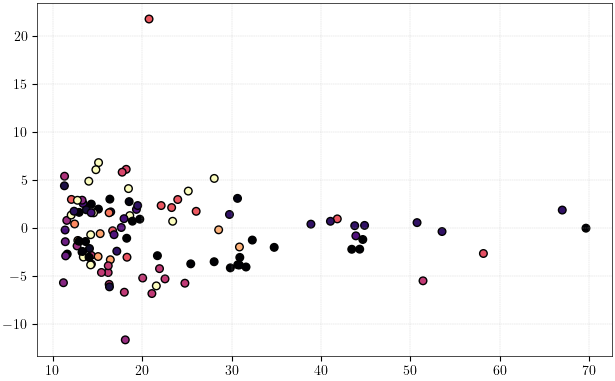

In [315]:
tel='gbo'
f=f'/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)




im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=30
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations full band")
plt.show()
df0=dfc
plt.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
plt.show()

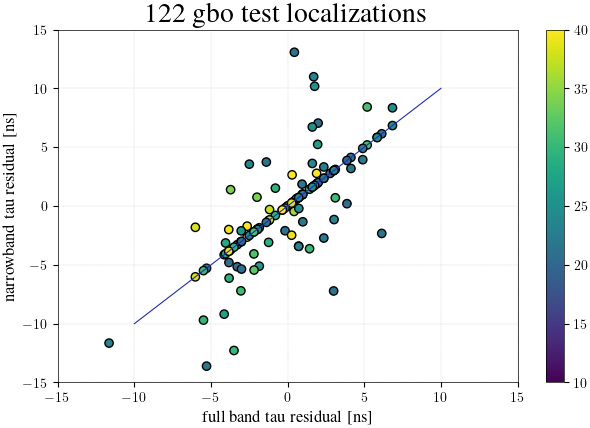

In [319]:

df_merged=df0.merge(df2,on=['event_id','name'],suffixes=('_og','_2'))


im=plt.scatter(df_merged['tau_xx_og']*1e3,df_merged['tau_xx_2']*1e3,c=df_merged['snr_xx_2'],vmin=10,vmax=40,edgecolor='black')
plt.colorbar(im)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('full band tau residual [ns]',fontsize=fontsize)
plt.ylabel('narrowband tau residual [ns]',fontsize=fontsize)
#plt.scatter(df_merged['snr_xx_og'],df_merged['snr_xx_2'])
plt.title(f"{len(df_merged)} {tel} test localizations ")
plt.plot([-10,10],[-10,10])


In [317]:
df_merged['tau_xx_og']*1e3-df_merged['tau_xx_2']*1e3

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
Length: 109, dtype: float64

# 1) error vs S/N

In [181]:
def get_theoretical_error(snr,bweff):
    num=0.184 #ns
    denom=(snr/7.5) * (bweff/400) #mhhz
    return np.sqrt(1+(num/denom)**2)

95
90
6.468353106876279


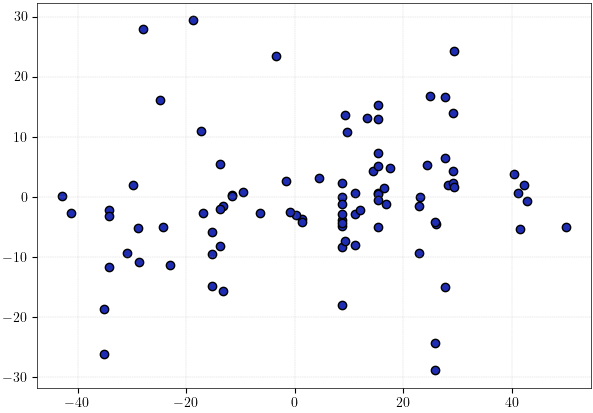

In [188]:
from scipy.stats import norm
ssize=20 #30
tel='gbo'
low=500
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
dfz=dfc[np.abs(dfc['delta_y']<20)]
print(np.sqrt(np.sum((np.array(dfz['tau_no_iono_xx']*1e3))**2)/len(dfz)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

im=ax.scatter(dfc['delta_y'],dfc['tau_xx']*1e3,edgecolor='black')#,c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]


In [ ]:
from scipy.stats import norm

kko_og_loc.csv
gbo_og_loc.csv
hco_og_loc.csv


Text(0.5, 1.0, '187 hco test localizations')

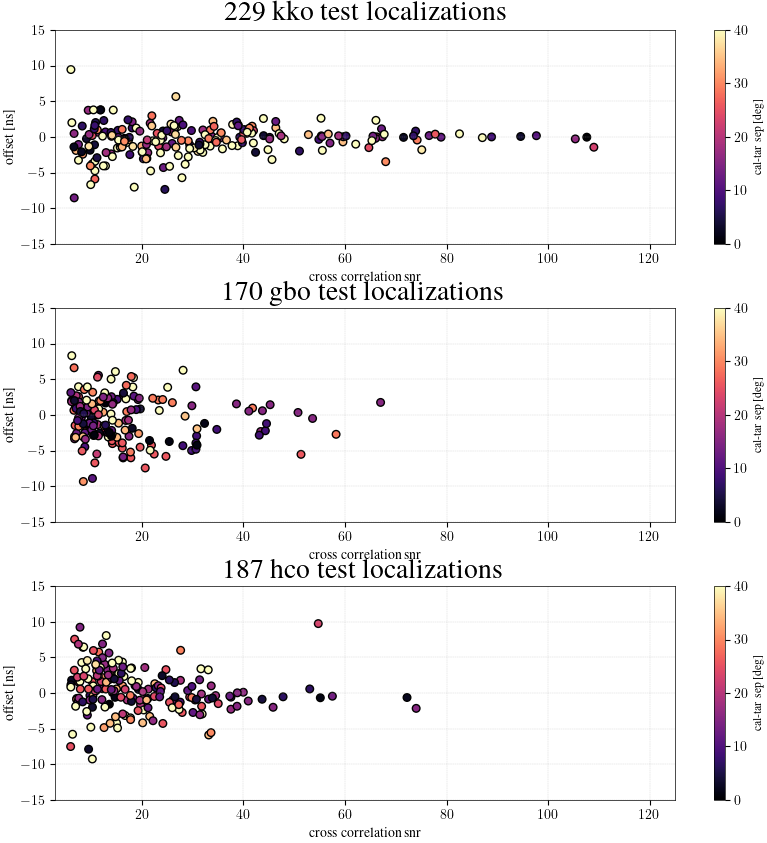

In [9]:
import numpy as np
fontsize=10
cmap='magma'
tel='kko'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

c='delta_y'
vmin=0
vmax=40
figure = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(3, 1, figure=figure,hspace=.3)

ax = plt.subplot(grid[0,0])

#ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
#ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)
dfc=dfc[::4]
im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,125)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel} test localizations")


ax = plt.subplot(grid[1,0])
tel='gbo'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)



#ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
#ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,125)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel} test localizations")



ax = plt.subplot(grid[2,0])
tel='hco'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)



#ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
#ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]

cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-15,15)
ax.set_xlim(3,125)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel} test localizations")




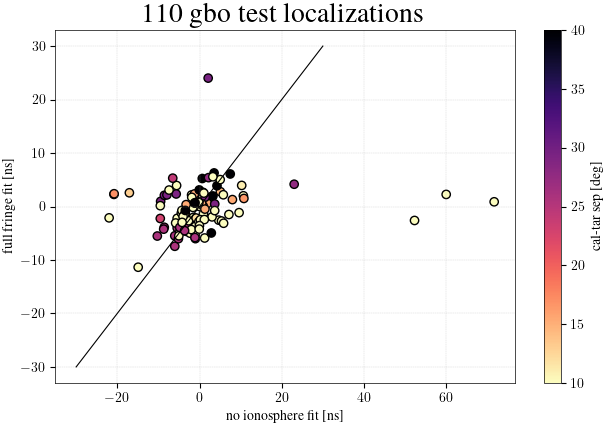

In [62]:
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df



keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>20) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>20) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx=dfx[dfx['best_pol']=="X"]
#dfx=dfx[np.abs(dfx['snr_xx'])>13].reset_index(drop=True)
#dfx=dfx[np.abs(dfx['tau_xx']*1e3)<20].reset_index(drop=True)

ax=plt.gca()
ax.set_title(f"{len(dfx)} {tel} test localizations")
im=ax.scatter(dfx['tau_no_iono_xx']*1e3,dfx['tau_xx']*1e3,c=dfx['delta_y'],cmap='magma_r',vmin=10,vmax=40,edgecolor='black')
ax.set_ylabel('full fringe fit [ns]',fontsize=fontsize)
ax.set_xlabel('no ionosphere fit [ns]',fontsize=fontsize)
ax.plot([-30,30],[-30,30],color='black')
cbar=plt.colorbar(im)
cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
plt.show()


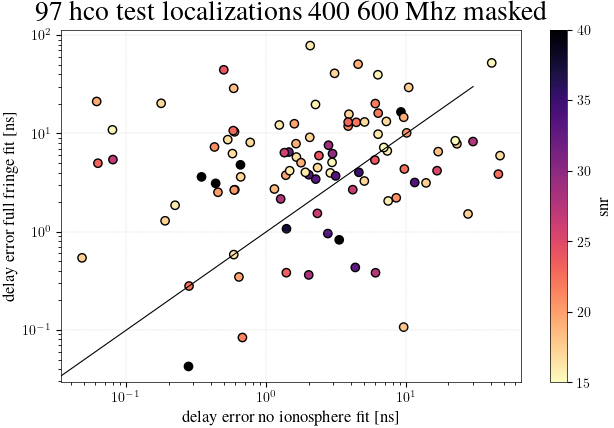

In [101]:
ssize=20 #30
tel='hco'
low=400
high=600
import numpy as np
fontsize=12
if tel!='hco':
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
else:
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
    
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df


if tel=='kko':
    limit=15
    limit2=13
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<50].reset_index(drop=True)
elif tel=='hco':
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<100].reset_index(drop=True)

else:
    limit=15
    limit2=13
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>limit) & (dfx['cal_incoh_snr_xx'][i]>limit2):
        keep.append("X")
    elif (dfx['snr_yy'][i]>limit) & (dfx['cal_incoh_snr_yy'][i]>limit2):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx=dfx[dfx['best_pol']=="X"]
#dfx=dfx[np.abs(dfx['snr_xx'])>13].reset_index(drop=True)
#dfx=dfx[np.abs(dfx['tau_xx']*1e3)<20].reset_index(drop=True)

ax=plt.gca()
ax.set_title(f"{len(dfx)} {tel} test localizations {low} {high} Mhz masked")
im=ax.scatter(np.abs(dfx['tau_no_iono_xx']*1e3),np.abs(dfx['tau_xx']*1e3),c=dfx['snr_xx'],cmap='magma_r',vmin=15,vmax=40,edgecolor='black')
ax.set_ylabel('delay error full fringe fit [ns]',fontsize=fontsize)
ax.set_xlabel('delay error no ionosphere fit [ns]',fontsize=fontsize)
ax.plot([-0,30],[-0,30],color='black')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(.02,100)
#ax.set_ylim(.02,100)
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.3, 4.1, 6.0, 7.8, 10.2])

# Fit a line y = ax + b (degree = 1)
a, b = np.polyfit(x, y, 1)

print(f"a = {a}, b = {b}")

# Plot
plt.scatter(x, y, label="Data")
plt.plot(x, a*x + b, color='red', label=f"Fit: y = {a:.2f}x + {b:.2f}")
plt.legend()
plt.show()


In [156]:
from glob import glob
#glob('plotting_data/*kko*')
out_ctimes=[]
out_names=[]
out_ras=[]
out_decs=[]
out_eids=[]
#df[['name','
files=glob('plotting_data/*.csv')
for file in files:
    df=pandas.read_csv(file)#'plotting_data/hco_comissioning2_M5_fit_all_kko_calibrator_neutral.csv')
    for event_id in np.unique(np.array(df['event_id'][:])):
        dfx=df[df['event_id']==event_id].reset_index(drop=True)
        for i in range(len(dfx)):
            ctime=dfx['ctime'][i]
            name=dfx['name'][i]
            ra=dfx['ra'][i]
            dec=dfx['dec'][i]

            out_names.append(name)
            out_ras.append(ra)
            out_decs.append(dec)
            out_ctimes.append(ctime)
            out_eids.append(event_id)

        ctime=dfx['ctime'][i]
        name=dfx['calibrator_name'][i]
        ra=dfx['calibrator_ra'][i]
        dec=dfx['calibrator_dec'][i]

        out_names.append(name)
        out_ras.append(ra)
        out_decs.append(dec)
        out_ctimes.append(ctime)
        out_eids.append(event_id)



out_df=pandas.DataFrame(out_names,columns=['name'])
out_df['ra']=out_ras
out_df['dec']=out_decs
out_df['ctime']=out_ctimes
out_df['event_id']=out_eids
#out_df.to_csv('for_iricore.csv',index=False)
print(len(out_df))
out_df=out_df.drop_duplicates()
out_df=out_df.dropna().reset_index(drop=True)
len(out_df)

9354


1810

In [163]:
#out_df=out_df.dropna().reset_index(drop=True)
#out_df.to_csv('for_iricore.csv',index=False)


In [232]:
         
tel='hco'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)
dfc=dfc.sort_values(by='tau_xx').reset_index(drop=True)
dfc['filename'][186]

hco_og_loc.csv


'/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/437236092/calibrated/J0701+6951_calibrated_to_J0706+4647_vis.h5'

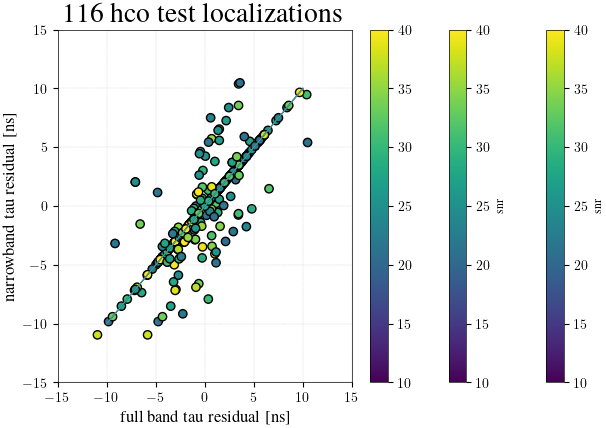

In [282]:
f='/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_600_800_masked.csv'
tel='hco'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)
dfc2=dfc



im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=30
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations 600-800 masked")

tel='hco'
f='/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)




im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=10
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations full band")

df_merged=dfc2.merge(dfc,on=['event_id','name'],suffixes=('_2','_og'))


im=plt.scatter(df_merged['tau_xx_og']*1e3,df_merged['tau_xx_2']*1e3,c=df_merged['snr_xx_2'],vmin=10,vmax=40,edgecolor='black')
plt.colorbar(im)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('full band tau residual [ns]',fontsize=fontsize)
plt.ylabel('narrowband tau residual [ns]',fontsize=fontsize)
#plt.scatter(df_merged['snr_xx_og'],df_merged['snr_xx_2'])
plt.title(f"{len(df_merged)} {tel} test localizations ")
plt.plot([-10,10],[-10,10])


In [ ]:
f='/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_600_800_masked.csv'
tel='hco'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)
dfc2=dfc



im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=30
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations 600-800 masked")

tel='hco'
f='/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)




im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=10
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations full band")

df_merged=dfc2.merge(dfc,on=['event_id','name'],suffixes=('_2','_og'))


im=plt.scatter(df_merged['tau_xx_og']*1e3,df_merged['tau_xx_2']*1e3,c=df_merged['snr_xx_2'],vmin=10,vmax=40,edgecolor='black')
plt.colorbar(im)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('full band tau residual [ns]',fontsize=fontsize)
plt.ylabel('narrowband tau residual [ns]',fontsize=fontsize)
#plt.scatter(df_merged['snr_xx_og'],df_merged['snr_xx_2'])
plt.title(f"{len(df_merged)} {tel} test localizations ")
plt.plot([-10,10],[-10,10])


Text(0.5, 1.0, '147 hco test localizations full band')

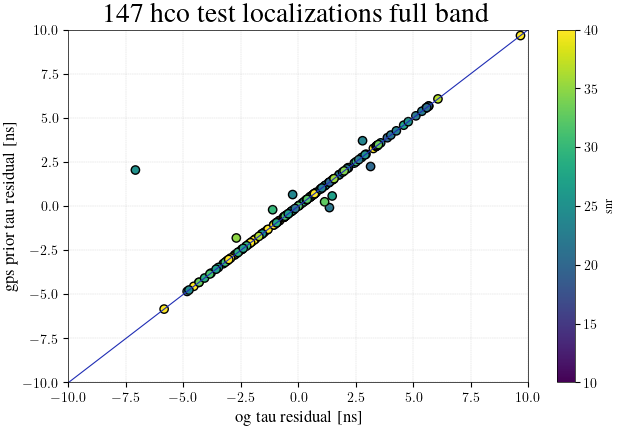

In [257]:
tel='hco'
f='/arc/home/shiona/OVP_astrometry/notebooks/plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated_bw_400_400_masked.csv'
df=pandas.read_csv(f)
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>20].reset_index(drop=True)


im=plt.scatter(dfc['tau_xx']*1e3,dfc['gps_tau_xx']*1e3,c=dfc['snr_xx'],vmin=10,vmax=40,edgecolor='black')
cbar=plt.colorbar(im)
cbar.set_label('snr')
MAX=10
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.plot([-10,10],[-10,10])
plt.ylabel('gps prior tau residual [ns]',fontsize=fontsize)
plt.xlabel('og tau residual [ns]',fontsize=fontsize)
plt.title(f"{len(dfc)} {tel} test localizations full band")


gbo_og_loc.csv


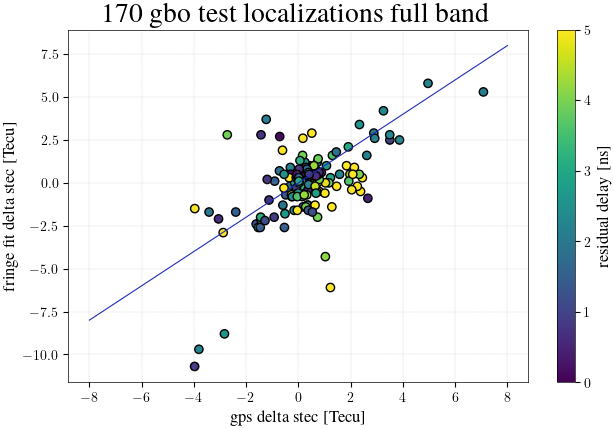

nu: 2.100585293477786
0.31347833479016707
s: 0.7934553981783774


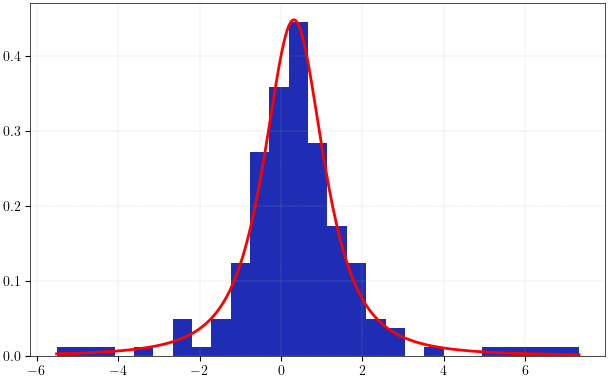

hco_og_loc.csv


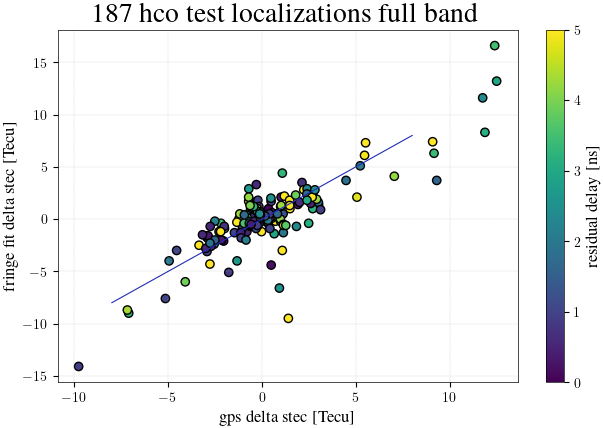

nu: 2.214263583065715
-0.20509773140475696
s: 0.9019212776533722


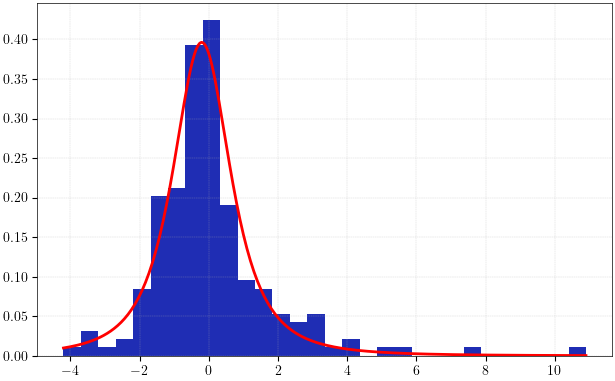

kko_og_loc.csv


Text(0.5, 1.0, '915 kko test localizations full band')

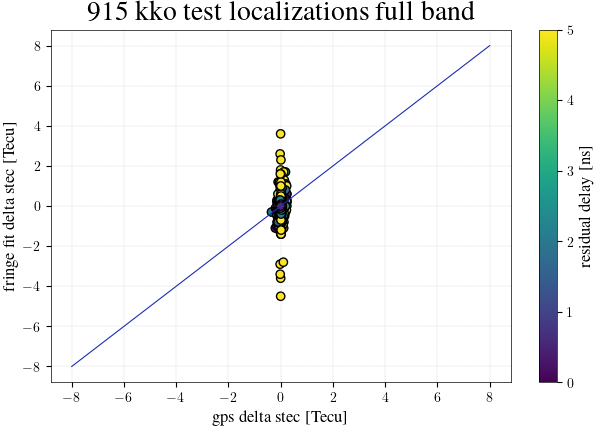

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


tel='gbo'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['tau_xx']*1e3),vmin=0,vmax=5,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('residual delay [ns]',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")
plt.show()

    
# PDF
df_fit, loc_fit, scale_fit = t.fit(np.array(tec_predicts)-dfc['tec_xx'])
print(f'nu: {df_fit}')
print(loc_fit)
print(f's: {scale_fit}')

count, bins, _ = plt.hist(np.array(tec_predicts)-dfc['tec_xx'],bins='auto',density=True)
x = np.linspace(min(bins), max(bins), 300)
pdf = t.pdf(x, df=df_fit, loc=loc_fit, scale=scale_fit)
plt.plot(x, pdf, 'r-', lw=2, label=f't PDF (df={df_fit:.2f})')

plt.show()

         
tel='hco'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['tau_xx']*1e3),vmin=0,vmax=5,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('residual delay [ns]',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")
plt.show()

# PDF
df_fit, loc_fit, scale_fit = t.fit(np.array(tec_predicts)-dfc['tec_xx'])
print(f'nu: {df_fit}')
print(loc_fit)
print(f's: {scale_fit}')
count, bins, _ = plt.hist(np.array(tec_predicts)-dfc['tec_xx'],bins='auto',density=True)
x = np.linspace(min(bins), max(bins), 300)
pdf = t.pdf(x, df=df_fit, loc=loc_fit, scale=scale_fit)
plt.plot(x, pdf, 'r-', lw=2, label=f't PDF (df={df_fit:.2f})')

plt.show()

tel='kko'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['tau_xx']*1e3),vmin=0,vmax=5,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('residual delay [ns]',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")


gbo_og_loc.csv


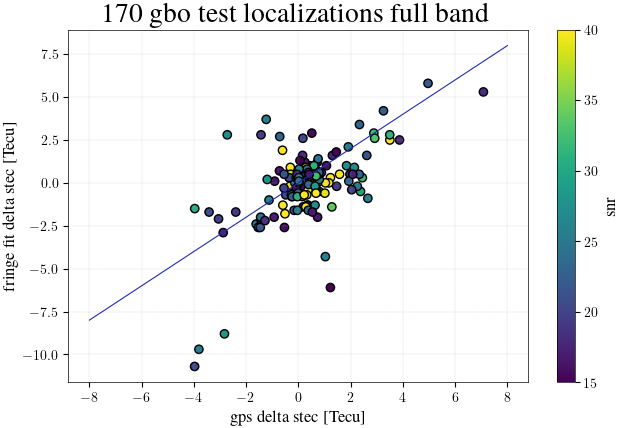

nu: 2.100585293477786
0.31347833479016707
s: 0.7934553981783774


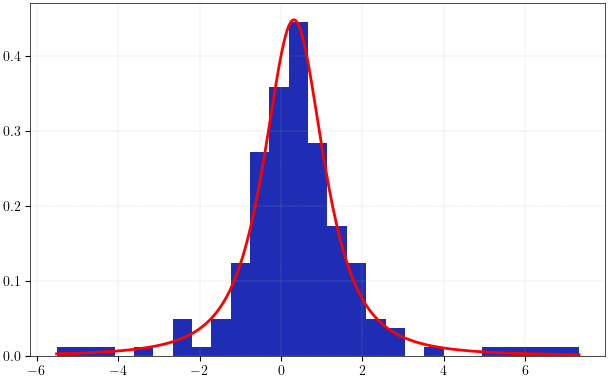

hco_og_loc.csv


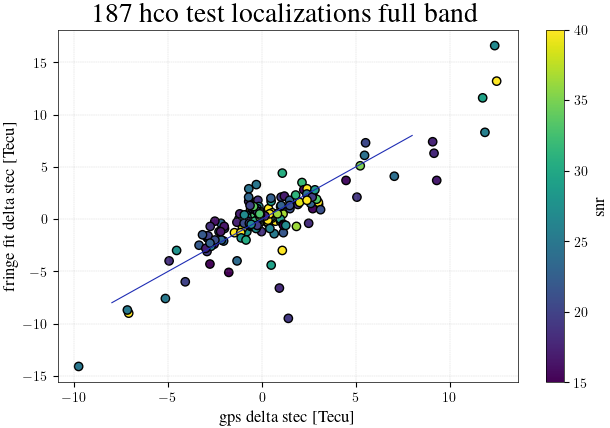

nu: 2.214263583065715
-0.20509773140475696
s: 0.9019212776533722


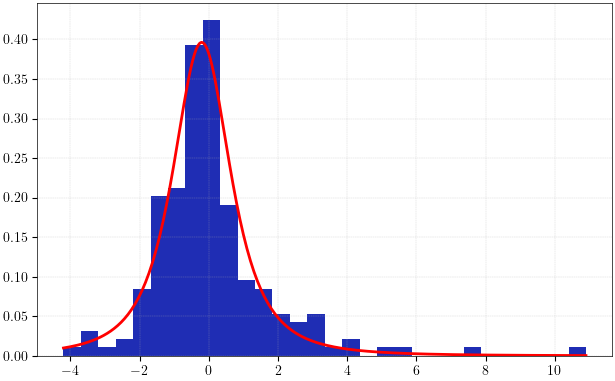

kko_og_loc.csv


Text(0.5, 1.0, '915 kko test localizations full band')

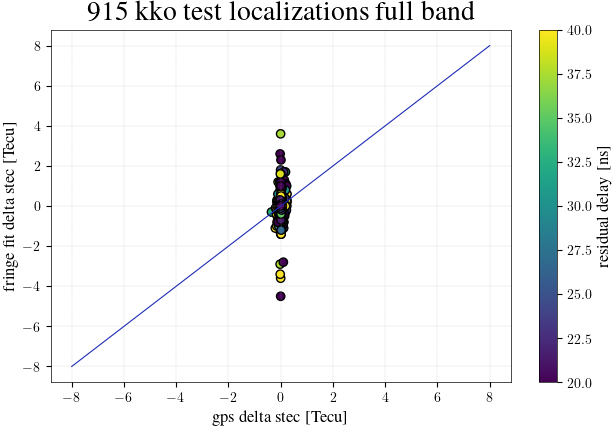

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


tel='gbo'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['snr_xx']),vmin=15,vmax=40,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")
plt.show()

    
# PDF
df_fit, loc_fit, scale_fit = t.fit(np.array(tec_predicts)-dfc['tec_xx'])
print(f'nu: {df_fit}')
print(loc_fit)
print(f's: {scale_fit}')

count, bins, _ = plt.hist(np.array(tec_predicts)-dfc['tec_xx'],bins='auto',density=True)
x = np.linspace(min(bins), max(bins), 300)
pdf = t.pdf(x, df=df_fit, loc=loc_fit, scale=scale_fit)
plt.plot(x, pdf, 'r-', lw=2, label=f't PDF (df={df_fit:.2f})')

plt.show()

         
tel='hco'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['snr_xx']),vmin=15,vmax=40,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")
plt.show()

# PDF
df_fit, loc_fit, scale_fit = t.fit(np.array(tec_predicts)-dfc['tec_xx'])
print(f'nu: {df_fit}')
print(loc_fit)
print(f's: {scale_fit}')
count, bins, _ = plt.hist(np.array(tec_predicts)-dfc['tec_xx'],bins='auto',density=True)
x = np.linspace(min(bins), max(bins), 300)
pdf = t.pdf(x, df=df_fit, loc=loc_fit, scale=scale_fit)
plt.plot(x, pdf, 'r-', lw=2, label=f't PDF (df={df_fit:.2f})')

plt.show()

tel='kko'
file=tel+'_og_loc.csv'
print(file)
dfc=pandas.read_csv(file)

tec_predicts=[]
#i=9
for i in range(len(dfc)):
    #print(dfc[['tec_xx','tau_xx']][i:i+1])
    dfx=df_ref[df_ref['event_id']==dfc['event_id'][i]]
    dftar=dfx[dfx['name']==dfc['calibrator_name'][i]].reset_index(drop=True)
    dfcal=dfx[dfx['name']==dfc['name'][i]].reset_index(drop=True)
    tec_predicts.append(dftar[f'dstec_iri_{tel}'][0]-dfcal[f'dstec_iri_{tel}'][0])
im=plt.scatter(tec_predicts,dfc['tec_xx'],c=np.abs(dfc['snr_xx']),vmin=20,vmax=40,edgecolor='black')
plt.xlabel('gps delta stec [Tecu]',fontsize=fontsize)
plt.ylabel('fringe fit delta stec [Tecu]',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('residual delay [ns]',fontsize=fontsize)
plt.plot([-8,8],[-8,8])
plt.title(f"{len(dfc)} {tel} test localizations full band")


In [175]:
dftar

name         ra        dec         ctime   event_id  dstec_iri_kko   
496  J1634+6245  248.64086  62.759971  1.736616e+09  433914880       0.616019  \

     dstec_iri_gbo  dstec_iri_hco  
496     -30.937435      -5.108291

In [160]:
df_ref=pandas.read_csv('/arc/home/shiona/iri_April13.csv')
def get_stec(event_id,ra,dec):
    dfx=df_ref[df_ref['event_id']==event_id]
    dfx

snr <20: a = -0.18228996849896315, b = -1.9256636682490866
snr <25: a = 0.015856469394755022, b = -0.9046523896727957
snr <30: a = 0.029924759089187753, b = -0.681293687130133
snr <35: a = 0.03303147388741713, b = -0.7616967356638134
snr <40: a = 0.032664054260407936, b = -0.7546634983880982
snr <45: a = 0.032761970235356916, b = -0.7406413256057504
snr <50: a = 0.03283070514909869, b = -0.7458938193999679
snr <55: a = 0.03216676753233802, b = -0.76974038787245
snr <60: a = 0.03216676753233802, b = -0.76974038787245
snr <65: a = 0.03241713088328934, b = -0.7503538121052512
snr <70: a = 0.03241713088328934, b = -0.7503538121052512
snr <75: a = 0.03241713088328934, b = -0.7503538121052512
snr <80: a = 0.03241713088328934, b = -0.7503538121052512
snr <85: a = 0.03241713088328934, b = -0.7503538121052512
<20: a = -0.18228996849896315, b = -1.9256636682490866
<25: a = 0.015856469394755022, b = -0.9046523896727957
<30: a = 0.029924759089187753, b = -0.681293687130133
<35: a = 0.0330314738874

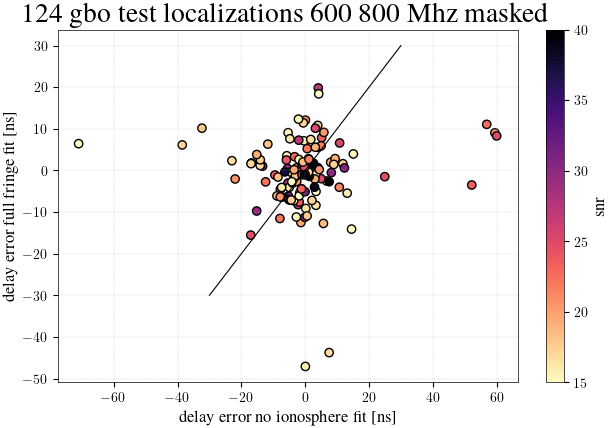

In [141]:
ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
if tel!='hco':
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
else:
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
   

#if tel!='hco':
#    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#else:
#    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated.csv')
    
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df


if tel=='kko':
    limit=15
    limit2=13
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<50].reset_index(drop=True)
elif tel=='hco':
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<100].reset_index(drop=True)

else:
    limit=15
    limit2=13
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>limit) & (dfx['cal_incoh_snr_xx'][i]>limit2):
        keep.append("X")
    elif (dfx['snr_yy'][i]>limit) & (dfx['cal_incoh_snr_yy'][i]>limit2):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx=dfx[dfx['best_pol']=="X"]
#dfx=dfx[np.abs(dfx['snr_xx'])>13].reset_index(drop=True)
#dfx=dfx[np.abs(dfx['tau_xx']*1e3)<20].reset_index(drop=True)

for snr in np.arange(20,90,5):
    dfc=dfx[dfx['snr_xx']<snr].reset_index(drop=True)
    x=np.array(dfc['tau_no_iono_xx']*1e3)
    y=np.array(dfc['tau_xx']*1e3)
    #print(np.mean(dfc['tau_no_iono_xx']/dfc['tau_xx']))
    #x=np.abs(x)
    #y=np.abs(y)
    a, b = np.polyfit(x, y, 1)
    print(f"snr <{snr}: a = {a}, b = {b}")
    
for snr in np.arange(20,40,5):
    dfc=dfx[dfx['snr_xx']<snr].reset_index(drop=True)
    x=np.array(dfc['tau_no_iono_xx']*1e3)
    y=np.array(dfc['tau_xx']*1e3)
    a, b = np.polyfit(x, y, 1)
    print(f"<{snr}: a = {a}, b = {b}")



ax=plt.gca()
ax.set_title(f"{len(dfx)} {tel} test localizations {low} {high} Mhz masked")
im=ax.scatter((dfx['tau_no_iono_xx']*1e3),(dfx['tau_xx']*1e3),c=dfx['snr_xx'],cmap='magma_r',vmin=15,vmax=40,edgecolor='black')
ax.set_ylabel('delay error full fringe fit [ns]',fontsize=fontsize)
ax.set_xlabel('delay error no ionosphere fit [ns]',fontsize=fontsize)
ax.plot([-30,30],[-30,30],color='black')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(.02,100)
#ax.set_ylim(.02,100)
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
plt.show()


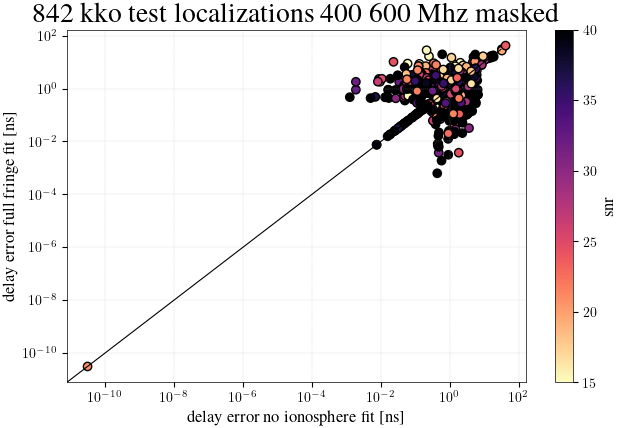

In [104]:
ssize=20 #30
tel='kko'
low=400
high=600
import numpy as np
fontsize=12
if tel!='hco':
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
else:
    df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated.csv')
    
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df


if tel=='kko':
    limit=15
    limit2=13
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<50].reset_index(drop=True)
elif tel=='hco':
    dfx=dfx[np.abs(dfx['tau_xx']*1e3)<100].reset_index(drop=True)

else:
    limit=15
    limit2=13
keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>limit) & (dfx['cal_incoh_snr_xx'][i]>limit2):
        keep.append("X")
    elif (dfx['snr_yy'][i]>limit) & (dfx['cal_incoh_snr_yy'][i]>limit2):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx=dfx[dfx['best_pol']=="X"]
#dfx=dfx[np.abs(dfx['snr_xx'])>13].reset_index(drop=True)
#dfx=dfx[np.abs(dfx['tau_xx']*1e3)<20].reset_index(drop=True)

ax=plt.gca()
ax.set_title(f"{len(dfx)} {tel} test localizations {low} {high} Mhz masked")
im=ax.scatter(np.abs(dfx['tau_no_iono_xx']*1e3),np.abs(dfx['tau_xx']*1e3),c=dfx['snr_xx'],cmap='magma_r',vmin=15,vmax=40,edgecolor='black')
ax.set_ylabel('delay error full fringe fit [ns]',fontsize=fontsize)
ax.set_xlabel('delay error no ionosphere fit [ns]',fontsize=fontsize)
ax.plot([-0,30],[-0,30],color='black')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(.02,100)
#ax.set_ylim(.02,100)
cbar=plt.colorbar(im)
cbar.set_label('snr',fontsize=fontsize)
plt.show()


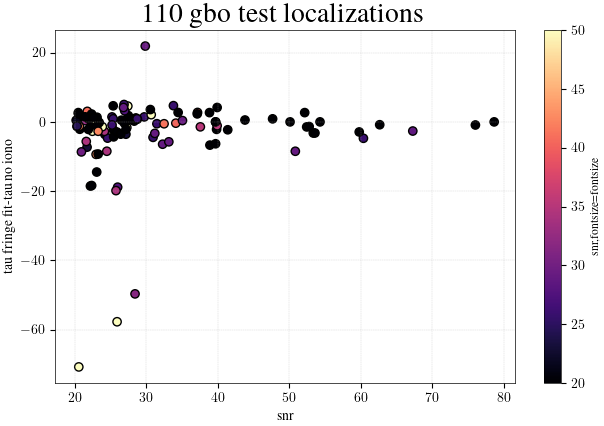

In [63]:
ax=plt.gca()
ax.set_title(f"{len(dfx)} {tel} test localizations")
im=ax.scatter(dfx['snr_xx'],(np.abs(dfx['tau_xx'])-np.abs(dfx['tau_no_iono_xx']))*1e3,c=np.abs(dfx['delta_y']),cmap='magma',vmin=20,vmax=50,edgecolor='black')
ax.set_xlabel('snr',fontsize=fontsize)
ax.set_ylabel('tau fringe fit-tau no iono',fontsize=fontsize)
cbar=plt.colorbar(im)
cbar.set_label('snr,fontsize=fontsize')
plt.show()

226
6.732489518764037


/tmp/ipykernel_2121/2486547890.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2121/2486547890.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


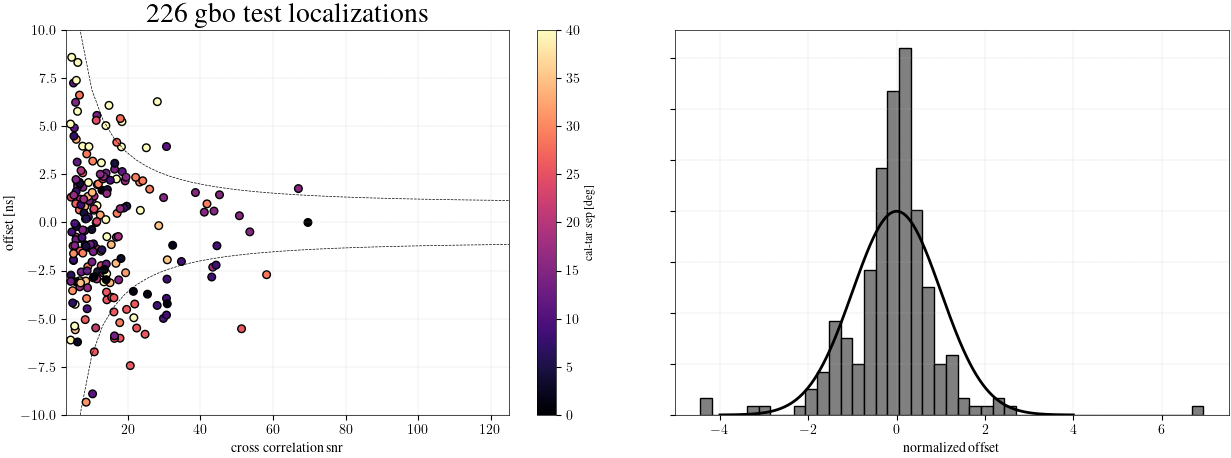

In [8]:
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)

#dfc=dfx[np.abs(dfx['delta_y'])<90].reset_index(drop=True)
#dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)
print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
bweff=8
yvals=get_theoretical_error(xvals,bweff)
#yvals=np.sqrt(1+yvals**2)


figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]



cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(3,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')

ax.set_title(f"{len(dfc)} {tel} test localizations")


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')



In [11]:
for i in (dfx[dfx['event_id']==438879433].reset_index(drop=True))['filename']:
    print(i)

/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438879433/calibrated/J0117+8928_calibrated_to_J234403.7+822640_vis.h5
/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438879433/calibrated/J2325+7917_calibrated_to_J234403.7+822640_vis.h5
/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438879433/calibrated/J2316+0405_calibrated_to_J234403.7+822640_vis.h5
/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438879433/calibrated/J2319+282A_calibrated_to_J234403.7+822640_vis.h5
/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438879433/calibrated/J2322+5057_calibrated_to_J234403.7+822640_vis.h5


In [5]:
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>20) & (dfx['incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>20) & (dfx['incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]
dfx.value_counts('event_id')

event_id
438535323    11
436854231     5
438879433     5
437505692     5
438011184     4
438433641     4
438431205     4
438321925     4
438226620     4
438773752     4
438536402     4
438120977     4
437236092     4
436684165     4
438775555     4
438003451     3
438529214     3
438648476     3
438043327     3
438100044     3
438050607     3
436581067     2
438300822     2
436743422     2
437499112     2
436621537     2
438566276     2
438528906     2
438036324     2
436840614     2
438643110     1
434903971     1
438508012     1
438491426     1
438185229     1
438109569     1
437574971     1
437246259     1
438909023     1
Name: count, dtype: int64

115
115
4.468639904389927


/tmp/ipykernel_33167/1054067392.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_33167/1054067392.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


115

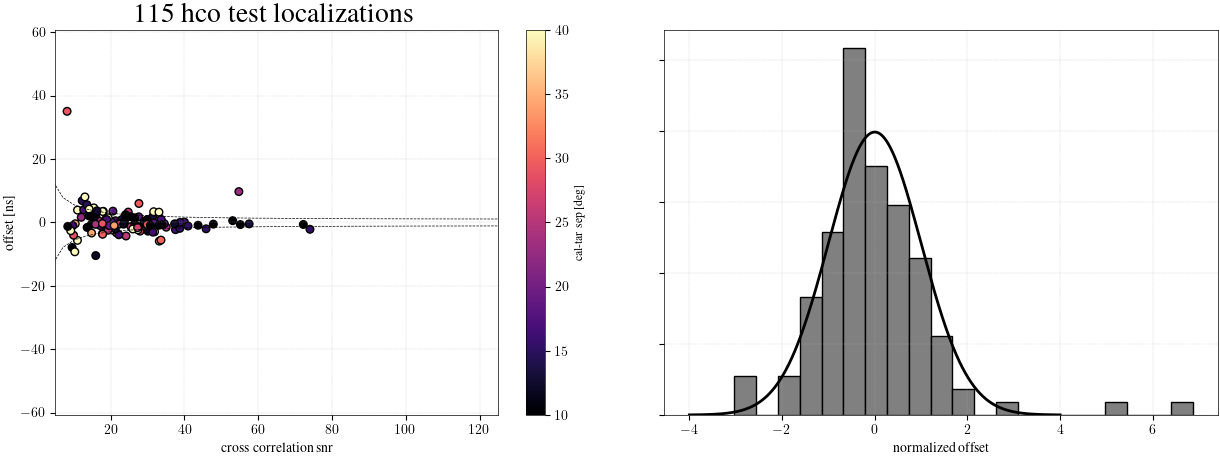

In [43]:
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
df=df[df['name']!='EXT']
df=df[df['calibrator_name']!='EXT']
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>20) & (dfx['incoh_snr_xx'][i]>10):
        keep.append("X")
    elif (dfx['snr_yy'][i]>20) & (dfx['incoh_snr_yy'][i]>10):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=10
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)
dfc=dfc[np.abs(dfc['snr_xx'])>10].reset_index(drop=True)

dfbad=dfc[np.abs(dfc['tau_xx'])>10].reset_index(drop=True)


dfc=dfx[np.abs(dfx['delta_y'])<90].reset_index(drop=True)
print(len(dfc))
#dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)
print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))


#dfm
#print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))


toss=(np.abs(np.array(dfc['tau_xx_ns']))>5) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfbad2=dfc[dfc['toss']==True].reset_index(drop=True)
#dfc=dfc[dfc['toss']==False]


xvals=np.linspace(1,150,50)
bweff=10
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])

ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]



cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

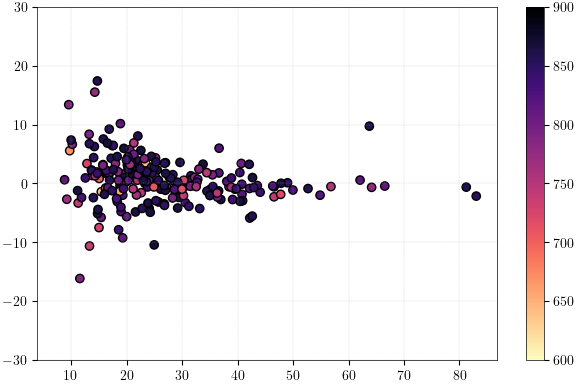

In [44]:
im=plt.scatter(df['snr_xx'],df['tau_xx']*1e3,c=df['bw_00'],vmin=600,vmax=900,cmap='magma_r',edgecolor='black')
plt.ylim(-30,30)

plt.colorbar(im)


In [ ]:
im=plt.scatter(df['snr_xx'],df['tau_xx']*1e3,c=df['bw_00'],vmin=600,vmax=900,cmap='magma_r',edgecolor='black')
plt.ylim(-30,30)

plt.colorbar(im)

In [10]:
i=0
file=dfbad2['filename'][0]
tec=dfbad2['tec_xx'][0]
print(file)
print(tec)
#files=glob('/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/438909023/calibrated/*')


/arc/projects/chime_frb/vlbi/OVP_astrometry_hco/M22_true_pos_fit_hco_MASK_RFI/437236092/calibrated/J0701+6951_calibrated_to_J0706+4647_vis.h5
-0.1999999999994344


915
849
75.3686744709146


/tmp/ipykernel_33167/1717857405.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['toss']=toss
/tmp/ipykernel_33167/1717857405.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_33167/1717857405.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


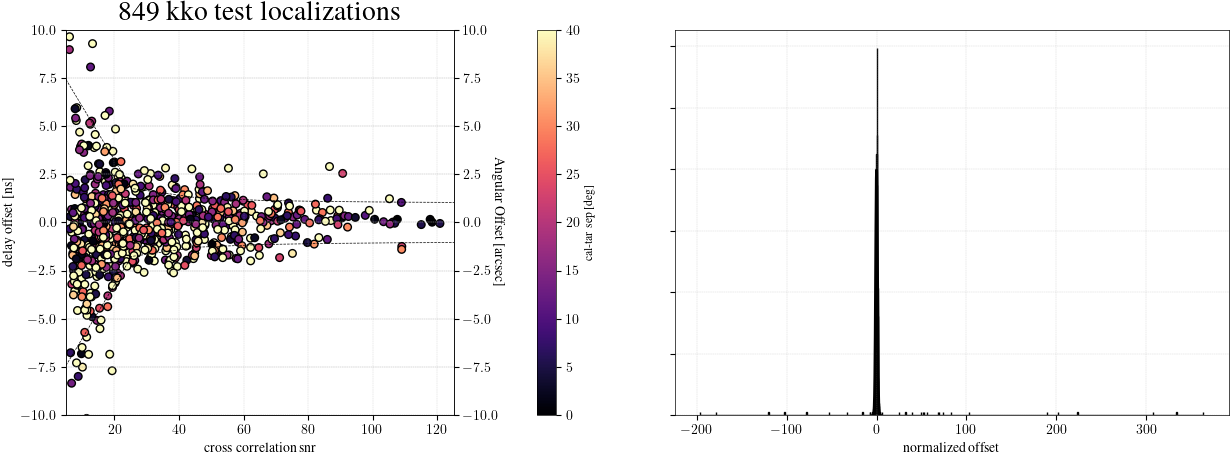

In [16]:
from scipy.stats import norm
tel='kko'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
#dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,1000,50)
bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3+.2,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [arcsec]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-10, 10)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


228
223
4.498910905941704
5.848584177724216
2.67285667105707


/tmp/ipykernel_2736/3991914238.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2736/3991914238.py:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


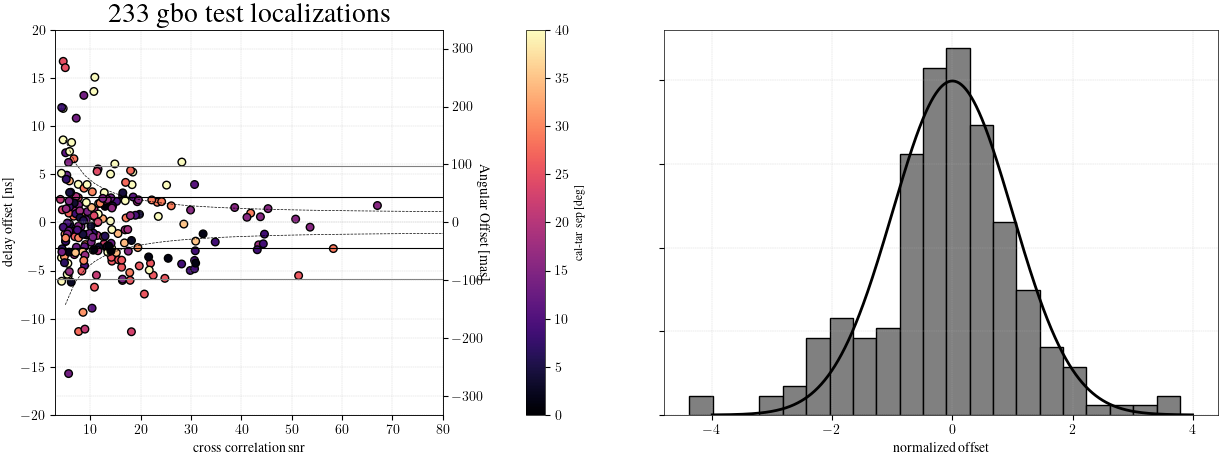

In [11]:
from scipy.stats import norm
tel='gbo'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M5_fit_all_{tel}_calibrator_neutral.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>13) & (dfx['cal_snr_xx_masked'][i]>13):
        keep.append("X")
    elif (dfx['snr_yy'][i]>13) & (dfx['cal_snr_yy_masked'][i]>13):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<20].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
#dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-166*2, 166*2)  # Since 1 ns corresponds to 1 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))*1.3
print(rms)
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')



dfm=dfc[(dfc['snr_xx']-9)>30].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
print(rms)
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+10} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3+.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


25
23
3.2386914250660084


/tmp/ipykernel_2736/905961530.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2736/905961530.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


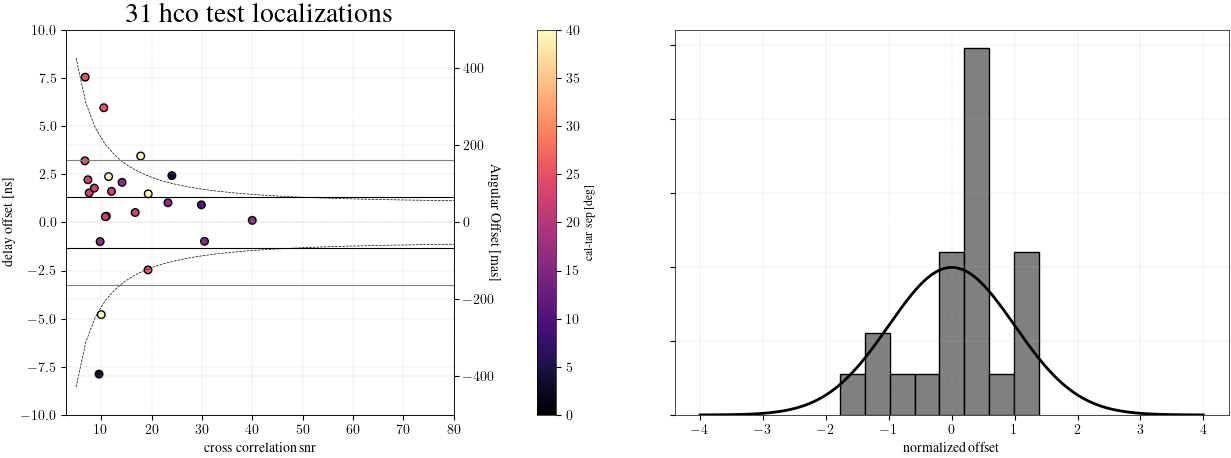

In [12]:
from scipy.stats import norm
tel='hco'
import numpy as np
fontsize=10
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_hco_MASK_RFI_all_hco_calibrator_calibrated.csv')
#df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if 'B' in dfx['name'][i]:
        if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
            keep.append("X")
        elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
            keep.append("Y")
        else:
            keep.append("F")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]

dfbad=dfc[np.abs(dfc['tau_xx_ns'])>20].reset_index(drop=True)

print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<10].reset_index(drop=True)

toss=(np.abs(np.array(dfc['tau_xx_ns']))>3) & (np.abs(np.array(dfc['snr_xx']))>30)
dfc['toss']=toss
dfc=dfc[dfc['toss']==False]

print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(5,100,50)
bweff=13
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

# Add second y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Angular Offset [mas]', fontsize=fontsize, rotation=-90)
ax2.set_ylim(-500, 500)  # Since 1 ns corresponds to 50 arcsec, limits remain the same


rms=calculate_rms(np.array(dfc['tau_xx'][:]*1e3))
ax.axhline(-rms,color='gray')
ax.axhline(rms,color='gray')



dfm=dfc[(dfc['snr_xx']-9)>20].reset_index(drop=True)
rms=calculate_rms(np.array(dfm['tau_xx'][:]*1e3))
ax.axhline(-rms,color='black')
ax.axhline(rms,color='black')
#print(calculate_rms(tausxx)*1e3)

cbar=plt.colorbar(im,pad=.15)
ax.set_ylabel('delay offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(3,80)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')
ax.set_title(f"{len(dfc)+8} {tel} test localizations")




ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist((dfc['tau_xx']*1e3-.2)/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


In [ ]:
df

In [42]:
ssize=20 #30
tel='kko'
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
df.keys()

Index(['incoh_snr_xx', 'incoh_snr_yy', 'ctime', 'event_id', 'calibrator_name',
       'calibrator_ra', 'calibrator_dec', 'ra', 'name', 'dec', 'kko_x',
       'kko_y', 'kko_z', 'tau_xx', 'tau_yy', 'tau_no_iono_xx',
       'tau_no_iono_yy', 'tec_xx', 'tec_yy', 'uncalibrated_snr_xx',
       'uncaibrated_snr_yy', 'calibrated_snr_xx', 'caibrated_snr_yy', 'snr_xx',
       'snr_yy', 'cal_snr_xx', 'cal_snr_yy', 'cal_incoh_snr_xx',
       'cal_incoh_snr_yy', 'cal_snr_xx_masked', 'cal_snr_yy_masked',
       'cal_incoh_snr_xx_masked', 'cal_incoh_snr_yy_masked', 'filename',
       'x_cal', 'y_cal', 'x_tar', 'y_tar', 'delta_x', 'delta_y',
       'pulsar_good_pos', 'tau_xx_ns', 'tau_yy_ns'],
      dtype='object')

# 2) Error vs narrowbandedness

240
228
3.050445525993271
kko_og_loc.csv
228


/tmp/ipykernel_2121/2977316833.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_2121/2977316833.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


228

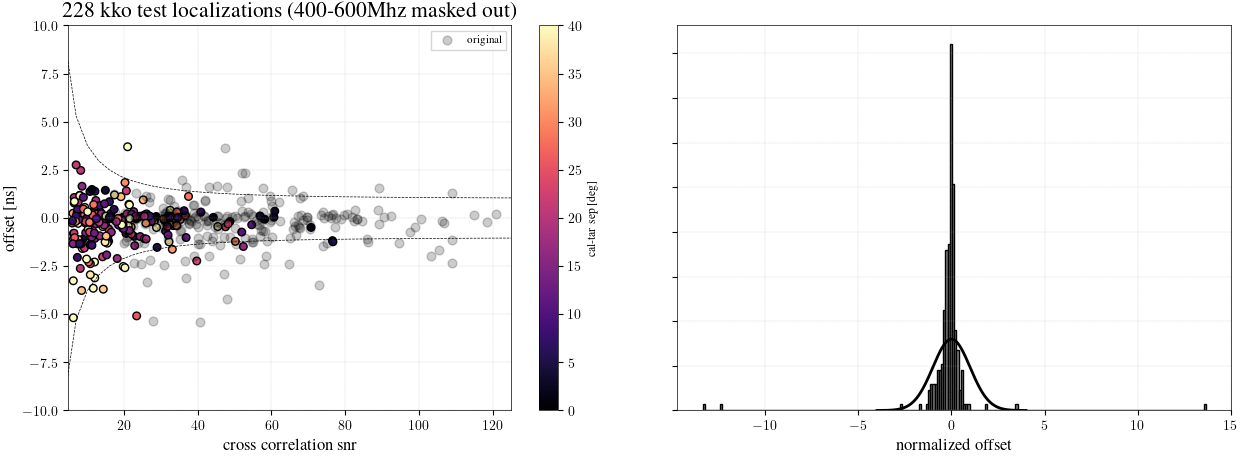

In [9]:

ssize=20 #30
tel='kko'
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()

cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

718
668
3.0636453481718195
kko_og_loc.csv
655


/tmp/ipykernel_46/1268807155.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/1268807155.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


668

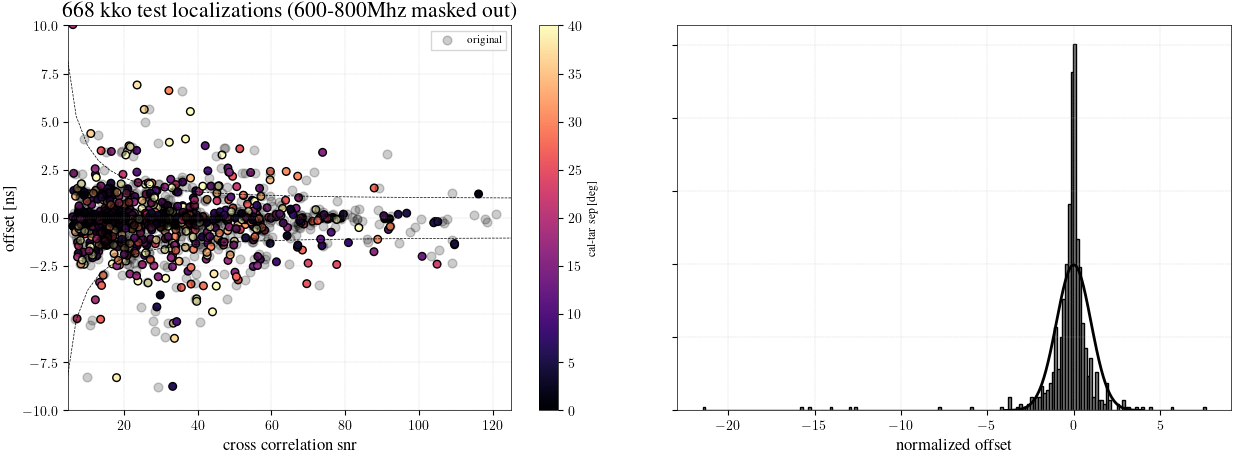

In [110]:

ssize=20 #30
tel='kko'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

652
588
3.1588518194973685
kko_og_loc.csv
573


/tmp/ipykernel_46/751236130.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/751236130.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


588

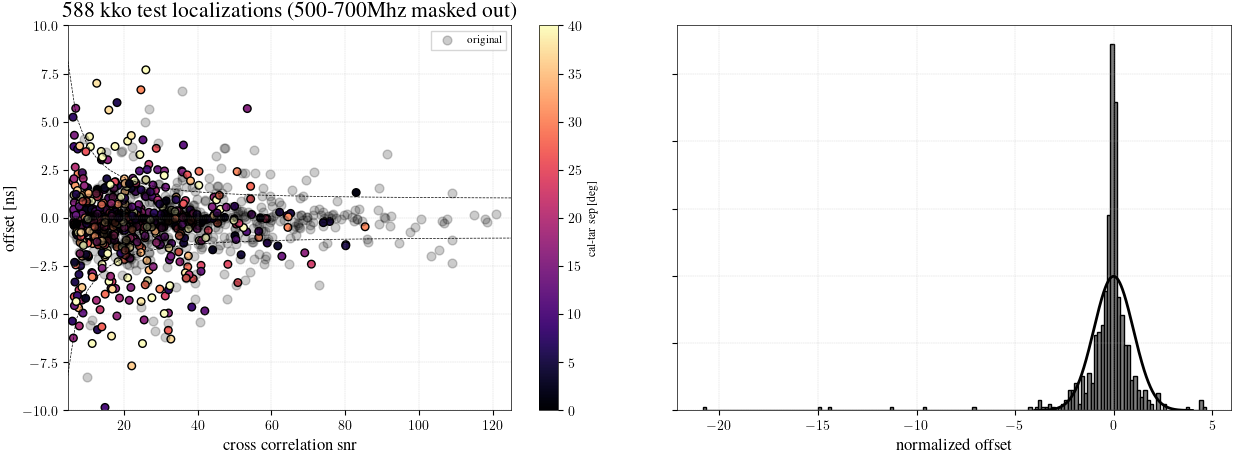

In [111]:

ssize=20 #30
tel='kko'
low=500
high=700
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

110
105
4.679540534396039
gbo_og_loc.csv
95


/tmp/ipykernel_46/750569563.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_46/750569563.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


105

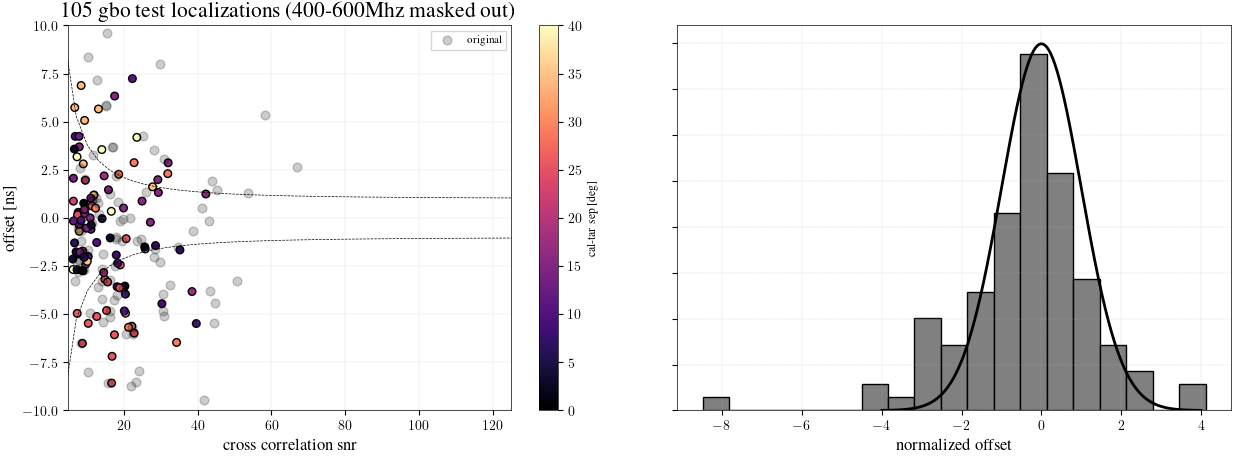

In [112]:

ssize=20 #30
tel='gbo'
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

119
117
13.729927282098437
gbo_og_loc.csv
105


/tmp/ipykernel_3373/2293681656.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/2293681656.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


117

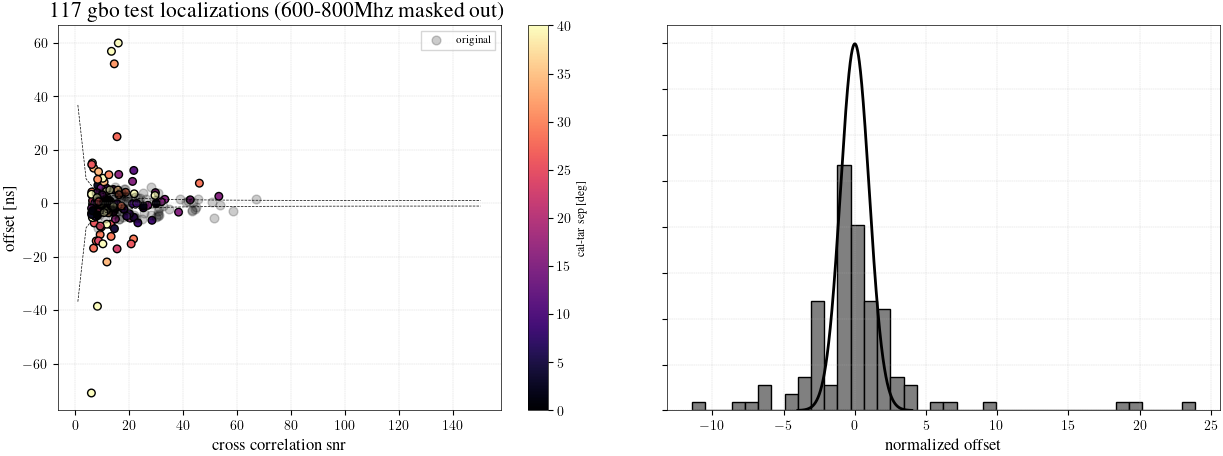

In [16]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

#dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-10,10)
#ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

119
117
13.729927282098437
X
nan
gbo_og_loc.csv
105


/tmp/ipykernel_3373/1563886822.py:47: RuntimeWarning: invalid value encountered in double_scalars
  print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))


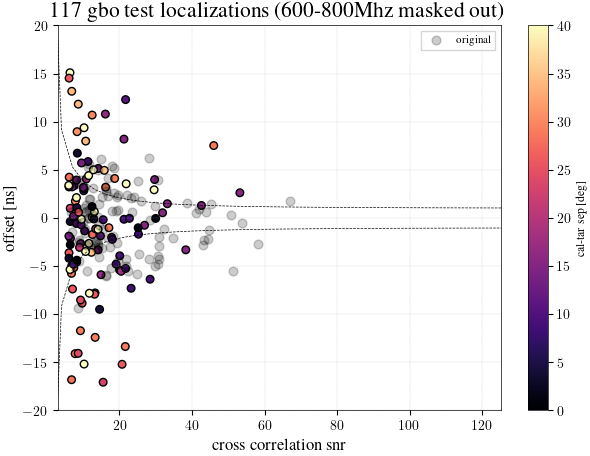

In [22]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

#dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))


print("X")
dfm=dfc[dfc['snr_xx']<10]
print(np.sqrt(np.sum((np.array(dfm['tau_xx']*1e3))**2)/len(dfm)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-20,20)
ax.set_xlim(3,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


111
109
8.83883622202182
gbo_og_loc.csv
170


/tmp/ipykernel_3373/679020969.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/679020969.py:94: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


109

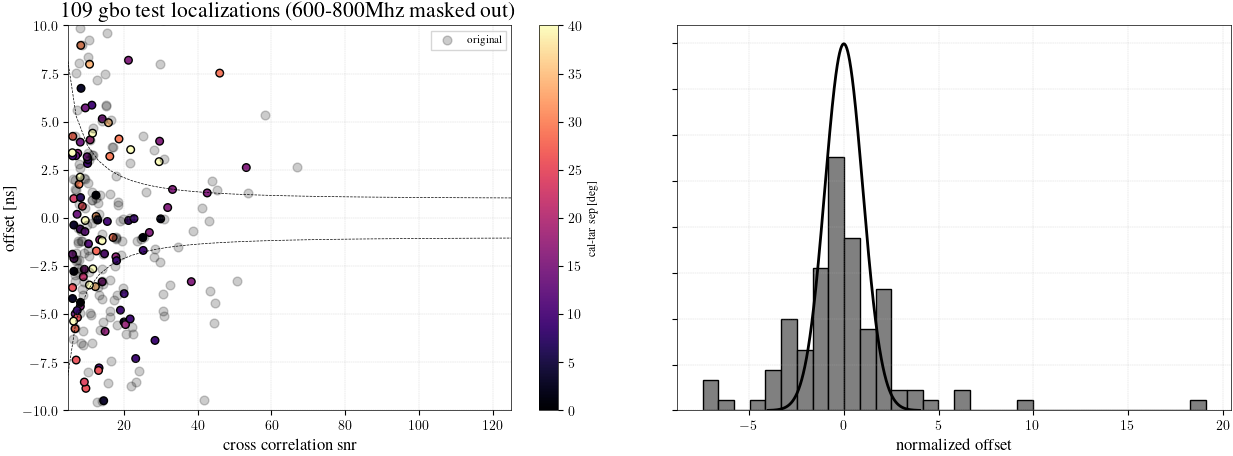

In [12]:

ssize=20 #30
tel='gbo'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)

ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)

file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=df_og#dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

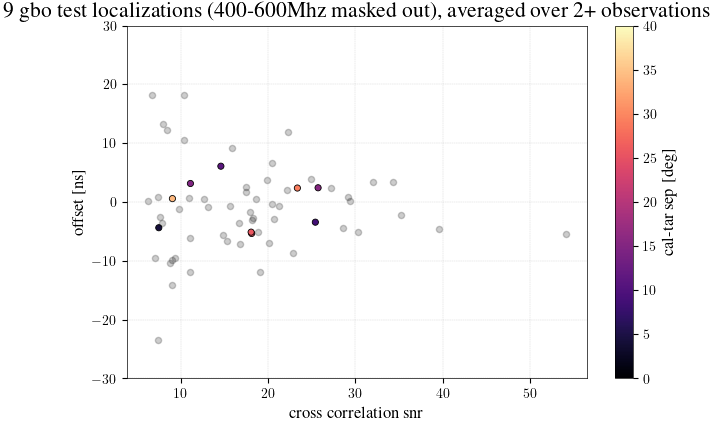

In [117]:
grouped_df = dfc.groupby(['name', 'calibrator_name']).agg(
    mean_value=('tau_xx', 'mean'),
    mean_value2=('delta_y', 'mean'),
    mean_value3=('snr_xx', 'mean'),
    count=('tau_xx', 'size')  # Number of rows in each group
).reset_index()
grouped_df['tau_xx']=grouped_df['mean_value']
grouped_df['delta_y']=grouped_df['mean_value2']
grouped_df['snr_xx']=grouped_df['mean_value3']
grouped_df=grouped_df[grouped_df['count']>2].reset_index(drop=True)

im=plt.scatter(grouped_df['snr_xx']-9,grouped_df['tau_xx']*1e3,edgecolor='black',linewidth=.6,c=np.abs((grouped_df['delta_y'])),s=ssize,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]



for i in range(9):
    dfx=dfc[(dfc['name']==grouped_df['name'][i])&(dfc['calibrator_name']==grouped_df['calibrator_name'][i])].reset_index(drop=True)
    #plt.scatter(dfx['tau_xx']*1e3,[grouped_df['tau_xx'][i]*1e3]*len(dfx))
    plt.scatter(dfx['snr_xx']-9,dfx['tau_xx']*1e3,s=ssize,color='black',alpha=.2,label='original')
plt.title(f"{len(grouped_df)} {tel} test localizations (400-600Mhz masked out), averaged over 2+ observations",fontsize=fontsize*1.3)
cbar=plt.colorbar(im)
plt.ylabel('offset [ns]',fontsize=fontsize)
plt.xlabel('cross correlation snr',fontsize=fontsize)
plt.ylim(-30,30)#plt.xlim(5,125)
cbar.set_label('cal-tar sep [deg]',fontsize=fontsize)

160
156
11.733084233163407
hco_og_loc.csv
145


/tmp/ipykernel_4537/254346655.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_4537/254346655.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


156

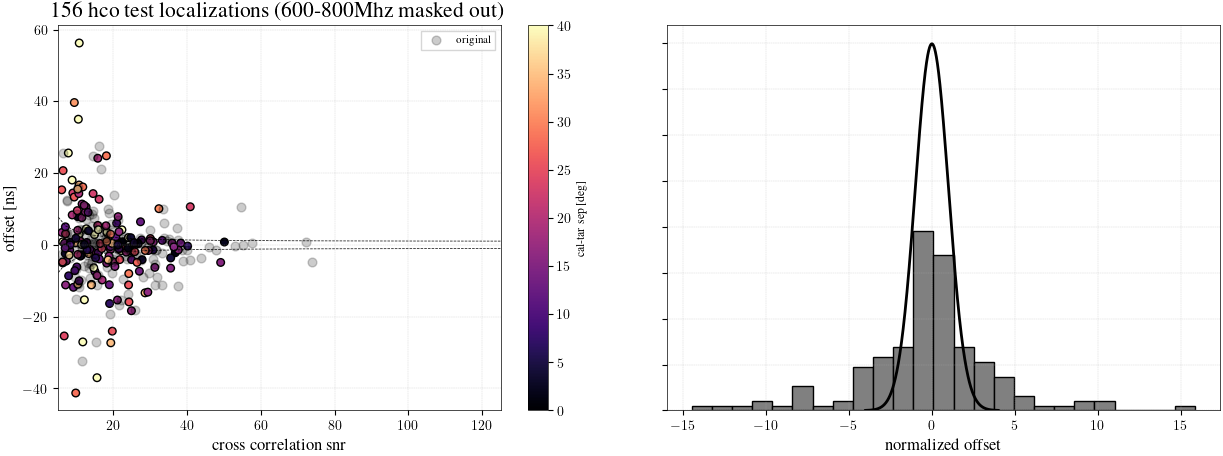

In [40]:
from scipy.stats import norm

ssize=20 #30
tel='hco'

ssize=20 #30
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


delay='tau_no_iono_xx'
im=ax.scatter(dfc['snr_xx']-9,dfc[delay]*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og[delay]*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
#ax.set_ylim(-20,20)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

718
668
3.0636453481718195
kko_og_loc.csv
915


/tmp/ipykernel_4537/4075984416.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_4537/4075984416.py:98: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


668

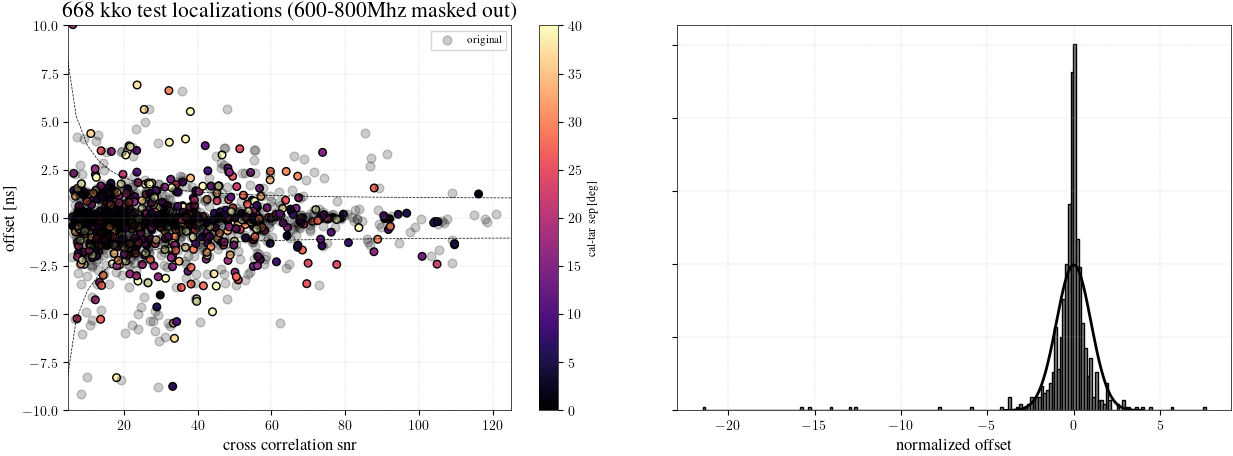

In [50]:

ssize=20 #30
tel='kko'
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])



delay='tau_no_iono_xx'
im=ax.scatter(dfc['snr_xx']-9,dfc[delay]*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)
ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)


ax.set_title(f"{len(dfc)} {tel} test localizations ({low}-{high}Mhz masked out)",fontsize=fontsize*1.3)

file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=df_og#dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

In [51]:
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name','snr_xx','tau_no_iono_xx','tau_xx']].merge(df_og,on=['event_id','name'])
df_og.keys()

Index(['event_id', 'name', 'snr_xx_x', 'tau_no_iono_xx_x', 'tau_xx_x',
       'Unnamed: 0', 'incoh_snr_xx', 'incoh_snr_yy', 'ctime',
       'calibrator_name', 'calibrator_ra', 'calibrator_dec', 'ra', 'dec',
       'kko_x', 'kko_y', 'kko_z', 'tau_xx_y', 'tau_yy', 'tau_no_iono_xx_y',
       'tau_no_iono_yy', 'tec_xx', 'tec_yy', 'uncalibrated_snr_xx',
       'uncaibrated_snr_yy', 'calibrated_snr_xx', 'caibrated_snr_yy',
       'snr_xx_y', 'snr_yy', 'cal_snr_xx', 'cal_snr_yy', 'cal_incoh_snr_xx',
       'cal_incoh_snr_yy', 'cal_snr_xx_masked', 'cal_snr_yy_masked',
       'cal_incoh_snr_xx_masked', 'cal_incoh_snr_yy_masked', 'filename',
       'x_cal', 'y_cal', 'x_tar', 'y_tar', 'delta_x', 'delta_y',
       'pulsar_good_pos', 'tau_xx_ns', 'tau_yy_ns', 'best_pol', 'toss'],
      dtype='object')

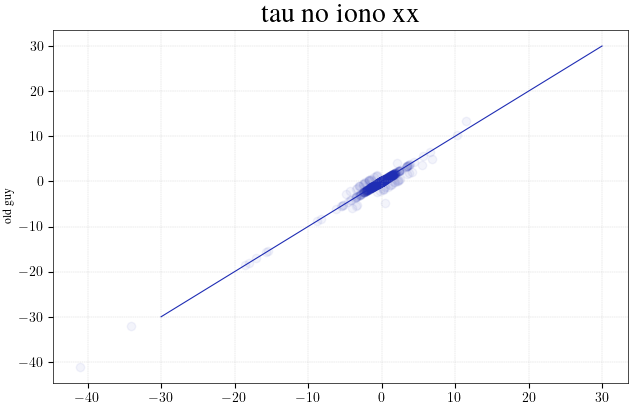

Text(0.5, 1.0, 'tau no xx')

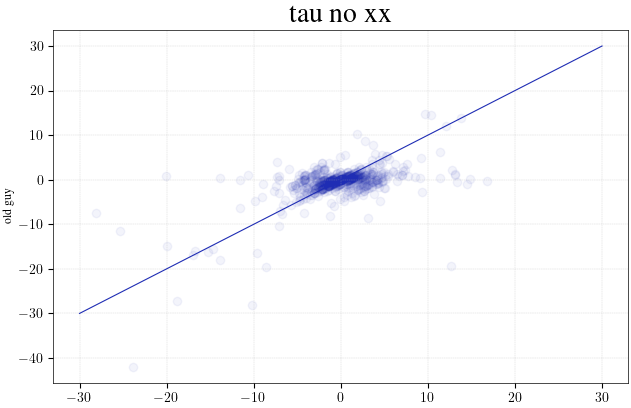

In [55]:
delay='tau_no_iono_xx'




ax=plt.gca()
ax.scatter(df_og[f'{delay}_x']*1e3,df_og[f'{delay}_y']*1e3,alpha=.05)
#plt.xlabel('snr og')

x=np.linspace(-30,30,100)
y=x
ax.plot(x,y)
y2=3*x
ax.set_ylabel('old guy')
#ax.fill_between(x, y1, y2, color='gray', alpha=0.5, label='filled area')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.title('tau no iono xx')
plt.show()

delay='tau_xx'



ax=plt.gca()
ax.scatter(df_og[f'{delay}_x']*1e3,df_og[f'{delay}_y']*1e3,alpha=.05)
#plt.xlabel('snr og')

x=np.linspace(-30,30,100)
y=x
ax.plot(x,y)
y2=3*x
ax.set_ylabel('old guy')
ax.set_title('tau no xx')
#ax.fill_between(x, y1, y2, color='gray', alpha=0.5, label='filled area')
#ax.set_xscale('log')
#ax.set_yscale('log')

23
22
15.381332858862727
hco_og_loc.csv
20


/tmp/ipykernel_6699/1969749911.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


AttributeError: 'Normalize' object has no attribute 'pdf'

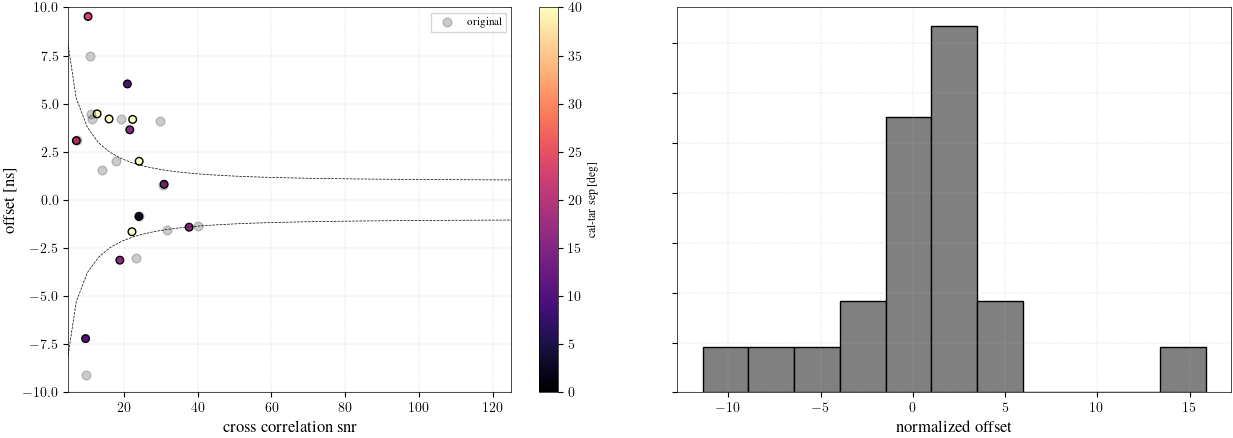

In [130]:

ssize=20 #30
tel='hco'

ssize=20 #30
low=600
high=800
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)
dfc[dfc['name']=='B0834+06']
dfx=df

keep=[]
for i in range(len(dfx)):
    if 'B' in dfx['name'][i]:
        if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
            keep.append("X")
        elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
            keep.append("Y")
        else:
            keep.append("F")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_no_iono_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_no_iono_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

In [164]:
dfc['ctime'][0]

1740702604.781253

88
82
6.211779005537869
hco_og_loc.csv
82


/tmp/ipykernel_3373/1889327828.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])
/tmp/ipykernel_3373/1889327828.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')


82

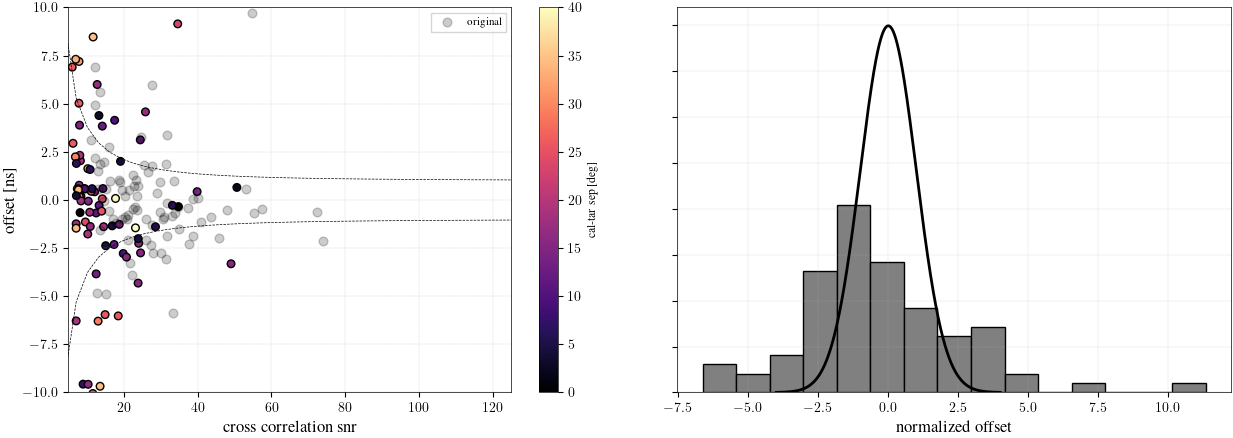

In [5]:
from scipy.stats import norm

ssize=20 #30
tel='hco'

ssize=20 #30
low=400
high=600
import numpy as np
fontsize=12
df=pandas.read_csv(f'plotting_data/hco_comissioning2_M22_true_pos_fit_{tel}_MASK_RFI_all_{tel}_calibrator_calibrated_bw_{low}_{high}_masked.csv')
df=df[df['pulsar_good_pos']==True].reset_index(drop=True)

dfx=df

keep=[]
for i in range(len(dfx)):
    if (dfx['snr_xx'][i]>15) & (dfx['cal_snr_xx_masked'][i]>15):
        keep.append("X")
    elif (dfx['snr_yy'][i]>15) & (dfx['cal_snr_yy_masked'][i]>15):
        keep.append("Y")
    else:
        keep.append("F")
dfx['best_pol']=keep
dfx=dfx[dfx['best_pol']!="F"]

c='delta_y'
if c=='delta_y':
    vmin=0
    vmax=40
    cmap='magma'
if c=='delta_x':
    vmin=-1
    vmax=1
    cmap='RdBu'

dfc=dfx[dfx['best_pol']=="X"]
dfc=dfc[dfc['cal_incoh_snr_xx']>10].reset_index(drop=True)

dfc=dfc[np.abs(dfc['delta_y'])<50].reset_index(drop=True)
print(len(dfc))
dfc=dfc[np.abs(dfc['tau_xx_ns'])<30].reset_index(drop=True)


print(len(dfc))
print(np.sqrt(np.sum((np.array(dfc['tau_no_iono_xx']*1e3))**2)/len(dfc)))

xvals=np.linspace(1,150,50)
yvals=get_theoretical_error(xvals,10)
yvals=np.sqrt(1+yvals**2)
#plt.plot(xvals,yvals,ls='--',color='gray',lw=.5)
#plt.plot(xvals,-yvals,ls='--',color='gray',lw=.5)


bweff=15
yvals=get_theoretical_error(xvals,bweff)
figure = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2, figure=figure,wspace=.1)

ax = plt.subplot(grid[0,0])


im=ax.scatter(dfc['snr_xx']-9,dfc['tau_no_iono_xx']*1e3,edgecolor='black',c=np.abs((dfc[c])),s=30,vmin=vmin,vmax=vmax,cmap=cmap)#vmin=0,vmax=20,s=30)#df[['tau_xx','tau_yy']]
ax.plot(xvals,yvals,ls='--',color='black',lw=.5)
ax.plot(xvals,-yvals,ls='--',color='black',lw=.5)


file=tel+'_og_loc.csv'
print(file)
df_og=pandas.read_csv(file)
df_og=dfc[['event_id','name']].merge(df_og,on=['event_id','name'])
print(len(df_og))
df_og=df_og.reset_index(drop=True)
ax.scatter(df_og['snr_xx']-9,df_og['tau_xx']*1e3,s=ssize*2,color='black',alpha=.2,label='original')
plt.legend()


cbar=plt.colorbar(im)
ax.set_ylabel('offset [ns]',fontsize=fontsize)
ax.set_xlabel('cross correlation snr',fontsize=fontsize)
ax.set_ylim(-10,10)
ax.set_xlim(5,125)
#plt.axvline(7.5)
cbar.set_label('cal-tar sep [deg]')


ax = plt.subplot(grid[0,1])
errors=get_theoretical_error(dfc['snr_xx']-9,bweff)
ax.set_yticklabels([''])
ax.hist(dfc['tau_xx']*1e3/errors,density=True,edgecolor='black',color='gray',bins='auto')
ax.set_xlabel(r'normalized offset',fontsize=fontsize)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Mean=0, Std=1 for standard normal

# Plot the normal curve
ax.plot(x, y, 'r-', lw=2, label='Unit Normal Curve',color='black')

len(dfc)

In [140]:
dfs=[]
from glob import glob
for file in glob(f'//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization*/*hco*.pkl'):
#for file in glob(f'/arc/projects/chime_frb/vlbi/hco_comissioning2/2025/03/16/439373176/localization_grid/*hco*.pkl'):
    print(file)#find_files(event_id,data_type='localization_grid',filename_suffix=name + '*' + 'hco' + '*' + '.pkl'):
    df=pandas.read_pickle(file)
    dfs.append(df)
df_all = pandas.DataFrame(dfs)


//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J1204+5202_hco_J1204+5202_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J120945.0+254703_hco_J120945.0+254703_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J234403.7+822640_hco_J234403.7+822640_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J1212+6708_hco_J1212+6708_localization.pkl
//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization_grid/439373176_gbo_J115312.4+805829_hco_J115312.4+805829_localization.pkl


In [ ]:
dfs=[]
from glob import glob
for file in glob(f'//arc/projects/chime_frb/vlbi/hco_comissioning_rfi/2025/03/16/439373176/localization*/*hco*.pkl'):
#for file in glob(f'/arc/projects/chime_frb/vlbi/hco_comissioning2/2025/03/16/439373176/localization_grid/*hco*.pkl'):
    print(file)#find_files(event_id,data_type='localization_grid',filename_suffix=name + '*' + 'hco' + '*' + '.pkl'):
    df=pandas.read_pickle(file)
    dfs.append(df)
df_all = pandas.DataFrame(dfs)


In [148]:
from astropy import units as u
from astropy.coordinates import SkyCoord

ra_center=182.434637+.01/3600/np.cos(np.deg2rad(dec_center))
dec_center=58.849084
c = SkyCoord(ra=ra_center*u.degree, dec=dec_center*u.degree, frame='icrs')
c.to_string('hmsdms')

'12h09m44.31416876s +58d50m56.7024s'

In [149]:
.31288-.31416876

-0.00128876

In [143]:
import datetime

def unix_to_utc(unix_timestamp):
  """Converts a Unix timestamp to a UTC datetime object.

  Args:
    unix_timestamp: An integer or float representing the Unix timestamp.

  Returns:
    A datetime object representing the UTC time, or None if the input is invalid.
  """
  try:
    return datetime.datetime.utcfromtimestamp(unix_timestamp)
  except (TypeError, ValueError):
    return None

# Example usage:
timestamp = 1742196675  # Example Unix timestamp
utc_datetime = unix_to_utc(timestamp)

if utc_datetime:
  print(f"Unix timestamp: {timestamp}")
  print(f"UTC datetime: {utc_datetime}")
else:
  print("Invalid Unix timestamp")

Unix timestamp: 1742196675
UTC datetime: 2025-03-17 07:31:15


Text(0.5, 1.0, 'localization ellipses')

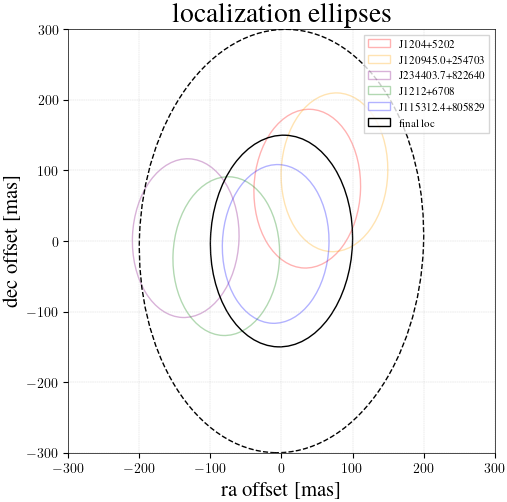

In [151]:
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Normalize the declinations for color mapping
declinations=df_all['chime-hco_calibrator_dec']
norm = mcolors.Normalize(vmin=min(declinations), vmax=max(declinations))
cmap = cm.viridis  # Choose your preferred colormap

df_final=df_all[df_all['chime-gbo_cal_used'].astype(str)=='J1212+6708']

colors=['red','orange','purple','green','blue']
import math
from matplotlib.patches import Ellipse

ra_center=182.434637
dec_center=58.849084
#,np.mean(df_final['ra'])#vis_target.ra[0]##loc_model.ra_best
#dec_center=np.mean(df_final['dec'])#vis_target.dec[0]#loc_model.dec_best


n=2
plt.figure(figsize=(5.5,5.5))
ax=plt.gca()

scale=3600*1e3
for i in range(len(dfs)):
    df=dfs[i]

    dec=df['chime-hco_calibrator_dec']
    color = cmap(norm(dec))
    if False:#dec==82.4445561011389:
        ellipse=Ellipse(xy=((df['ra']-ra_center)*scale*np.cos(np.deg2rad(dec_center))+20,
                            (df['dec']-dec_center)*scale), 
                        width=1.5*100,#n*df['b_error']*scale*np.cos(np.deg2rad(dec_center)),
                        height=150*1.5,#1*df['a_error']*scale,
                        lw=1,fc='None',edgecolor=colors[i],linestyle='-',label=names[i],
                        angle=-df['theta'],alpha=.3) #1sigma
    else:
        ellipse=Ellipse(xy=((df['ra']-ra_center)*scale*np.cos(np.deg2rad(dec_center)),
                            (df['dec']-dec_center)*scale), 
                        width=1.5*100,#n*df['b_error']*scale*np.cos(np.deg2rad(dec_center)),
                        height=150*1.5,#1*df['a_error']*scale,
                        lw=1,fc='None',edgecolor=colors[i],linestyle='-',label=df['chime-hco_cal_used'].astype(str),
                        angle=-2.4,alpha=.3) #1sigma
    ax.add_patch(ellipse)
    ax.autoscale_view()
    
    
    
ellipse=Ellipse(xy=((0)*scale*np.cos(np.deg2rad(dec_center)),
                    (0)*scale), 
                width=4*100,
                height=4*150,
                lw=1,ls='--',fc='None',edgecolor='black',linestyle='-',#label='final loc',
                angle=-df['theta'],alpha=1) #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()


ellipse=Ellipse(xy=((0)*scale*np.cos(np.deg2rad(dec_center)),
                    (0)*scale), 
                width=2*100,
                height=2*150,
                lw=1,ls='-',fc='None',edgecolor='black',linestyle='',label='final loc',
                angle=-df['theta'],alpha=1) #1sigma
ax.add_patch(ellipse)
ax.autoscale_view()

    
ax.legend(loc='upper right')
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
fontsize=15
ax.set_xlabel('ra offset [mas]',fontsize=fontsize)
ax.set_ylabel('dec offset [mas]',fontsize=fontsize)
ax.set_title('localization ellipses')


In [150]:
df['theta']

2.0628499233078474

{'event_id': 439373176,
 'ra': 182.43464696735737,
 'dec': 58.849105119272444,
 'theta': 2.062175802218905,
 'b_error': 3.214088119973217e-05,
 'a_error': 9.314790220937457e-05,
 'DM': 161.3453369141,
 'chime-gbo_cal_used': b'J1204+5202',
 'chime-gbo_calibrator_ra': 181.07754572083329,
 'chime-gbo_calibrator_dec': 52.03822832222222,
 'chime-gbo_tec_best': -0.5299999999999996,
 'chime-gbo_ctime': 1742114028.5024447,
 'chime-hco_cal_used': b'J1204+5202',
 'chime-hco_calibrator_ra': 181.07754572083329,
 'chime-hco_calibrator_dec': 52.03822832222222,
 'chime-hco_tec_best': -0.01999999999999913,
 'chime-hco_ctime': 1742114028.5072489}

# 4) NCP-XX loc versus impact parameter to sun (ionosphere effect)

# 5) 